In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family']='NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns', None)

# 데이터 불러오기, 병합 및 변경내용
- 컬럼 제거 : 데이터셋 log&service 겹치는 컬럼 제거
- 컬럼명 변경 : service에 있는 평점은 해당 서비스의 평균 평점이므로 평균평점으로 컬럼명을 바꾸고 조인함
- 컬럼 추가 : `판매금액`*`수수료`-> `L사매출` , `사용기기`-> `사용기기_제조사`, `사용OS`-> `운영체제`
- 안 써도 될 만한 컬럼 : '사용기기', '사용OS', '판매자ID'(판매자도 유니크한 의미를 가져서)

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns', None)

li = ['Customer_data.csv', 'Expert_Data.csv','Log_Data02.csv', 'Service_Data.csv']
customer = pd.read_csv(li[0])
expert = pd.read_csv(li[1])
log = pd.read_csv(li[2])
service = pd.read_csv(li[3], encoding='cp949')
log['L사매출'] = log['판매금액']*log['수수료율']

service.columns = ['서비스명', '판매자', '서비스가격', '평균평점', '대분류', '서비스번호', '누적판매수']
service = service[['평균평점','서비스번호', '누적판매수']]

l_s = pd.merge(log, service, how='left', on='서비스번호')
l_s_e = pd.merge(l_s, expert, how='left', on='판매자')
df = pd.merge(l_s_e, customer, how='left', on='고객ID')


df.columns= ['거래일자', '수수료율', '고객ID', '프로그램수정횟수', '추가결제금액', '거래취소여부', '거래취소일자',
       '서비스명', '판매자', '판매금액', '서비스가격', '평점', '이용자수', '대분류', '서비스번호', 'L사매출',
       '평균평점', '누적판매수', '판매자ID', '판매_서비스_수', '총_판매_금액', '프리미엄_서비스_가입여부',
       '신속_알람_서비스_사용여부', '사용기기', '사용OS', '유입경로', '회원상태', '거주지', '연령', '성별',
       '서비스총구매수', '총구매금액', '총수정요청수', '총추가결제금액']

In [4]:
org_df = df.copy()

In [5]:
df = org_df.copy()

# 데이터 전처리

## 결측치 처리
- 인스턴스 제거 : "서비스명","판매자","판매금액","서비스가격","평점","이용자수","대분류","서비스번호","L사매출","평균평점","누적판매수","판매_서비스_수"</br>
,"총_판매_금액","프리미엄_서비스_가입여부","신속_알람_서비스_사용여부","총구매금액", "연령", "성별", "유입경로"
</br>이유 : 서비스명, 판매자, 서비스번호 등 결측치를 채울 수 있는 중요 요소들이 결측치 임으로

- 조건 인스턴스 제거 : 프로그램수정횟수가 float

- 결측치대체 : 거래취소여부 fillna(0)
- 컬럼 유지 : 거래취소일자 : 거래취소여부는 결측치 0으로 채우고 거래취소일자는 제거(결측치율도 높고, 살릴 수 있을 것 같지 않아서)

In [6]:
for col in df.columns:
    if df[col].isna().sum() !=0 :
        print('{}\t{:<10} 개수:{:<10}\t결측치율 : {:.2f}%'.format(df[col].dtypes,col,df[col].isna().sum(),df[col].isna().sum()/df.shape[0]*100))

float64	거래취소여부     개수:339702    	결측치율 : 98.66%
float64	거래취소일자     개수:339702    	결측치율 : 98.66%
object	서비스명       개수:22        	결측치율 : 0.01%
object	판매자        개수:22        	결측치율 : 0.01%
float64	판매금액       개수:21        	결측치율 : 0.01%
float64	서비스가격      개수:22        	결측치율 : 0.01%
float64	평점         개수:22        	결측치율 : 0.01%
float64	이용자수       개수:22        	결측치율 : 0.01%
object	대분류        개수:22        	결측치율 : 0.01%
float64	서비스번호      개수:22        	결측치율 : 0.01%
float64	L사매출       개수:21        	결측치율 : 0.01%
float64	평균평점       개수:22        	결측치율 : 0.01%
float64	누적판매수      개수:22        	결측치율 : 0.01%
object	판매자ID      개수:22        	결측치율 : 0.01%
float64	판매_서비스_수   개수:22        	결측치율 : 0.01%
float64	총_판매_금액    개수:22        	결측치율 : 0.01%
object	프리미엄_서비스_가입여부 개수:22        	결측치율 : 0.01%
object	신속_알람_서비스_사용여부 개수:22        	결측치율 : 0.01%
object	유입경로       개수:3840      	결측치율 : 1.12%
float64	연령         개수:4702      	결측치율 : 1.37%
object	성별         개수:25637     	결측치율 : 7.45%
float64	총구매금액      개수:5         	

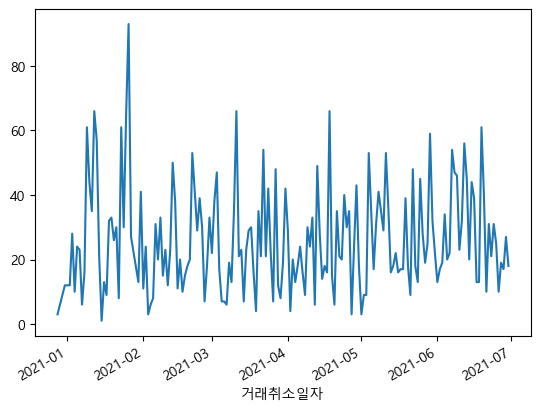

In [7]:
df2 = df[['거래취소일자','거래취소여부']].copy()
df2 = df2.dropna()
df2['거래취소일자'] = pd.to_datetime(df['거래취소일자'], format='%Y%m%d')
df2.groupby('거래취소일자')['거래취소여부'].sum().plot(kind='line')
plt.show()

In [8]:
# 인스턴스 제거
col = ["서비스명","판매자","판매금액","서비스가격","평점","이용자수","대분류","서비스번호","L사매출","평균평점","누적판매수","판매_서비스_수","총_판매_금액","프리미엄_서비스_가입여부"
       ,"신속_알람_서비스_사용여부","총구매금액",'연령','성별','유입경로']

df = df.dropna(subset = col, axis=0)

# 결측치 대체
df['거래취소여부'] = df['거래취소여부'].fillna(0)
df = df.reset_index(drop=True)

# 컬럼 제거
df = df.drop(columns=['거래취소일자', '평점'],axis=1)
# 평점은 중복되어 평균평점 남김

# 조건 인스턴스 제거
cond = (0 < df['프로그램수정횟수'] * 10) & (df['프로그램수정횟수'] * 10 < 10)
idx = df.loc[cond,:].index
df = df.drop(index=idx).reset_index(drop=True)
df.shape

(310730, 32)

In [9]:
for col in df.columns:
    if df[col].isna().sum() !=0 :
        print('{}\t{:<10} 개수:{:<10}\t결측치율 : {:.2f}%'.format(df[col].dtypes,col,df[col].isna().sum(),df[col].isna().sum()/df.shape[0]*100))

## 파생 변수 생성

In [10]:
# 삼성, LG, 애플 기기 모델 정의
삼성 = {'SM', 'SHV', 'SHW', 'SC', 'IM', 'GT'}
엘지 = {'LG', 'LGM', 'LM'}
애플 = {'iPhone', 'iPad'}

# 브랜드 매칭 함수 정의
def get_brand(device_name):
    if any(model in device_name for model in 삼성):
        return 'SAMSUNG'
    elif any(model in device_name for model in 엘지):
        return 'LG'
    elif any(model in device_name for model in 애플):
        return 'APPLE'
    else:
        return 'ETC'

df['사용기기_제조사']= df['사용기기'].astype(str).apply(get_brand)
df = df.drop(columns=['사용기기'], axis=1)
# 연령대는 이상치 처리후
# df['연령대'] = df['연령']//10*10
df['L사매출'] = (df['판매금액']+ df['추가결제금액']*2)*df['수수료율'].astype(float)*0.01
df['판매금액_5만원'] = ['5만원 초과 지불 고객' if x > 50000 else '5만원 이하 지불 고객' for x in df['판매금액']]
df['판매금액_20만원'] = ['20만원 이상 지불 고객' if x >= 200000 else '20만원 미만 지불 고객' for x in df['판매금액']]
df['거래일자']=pd.to_datetime(df['거래일자'].astype(str), format='%Y%m%d')

df['요일'] = df['거래일자'].dt.day_name()

요일 = {
    'Monday': '월',
    'Tuesday': '화',
    'Wednesday': '수',
    'Thursday': '목',
    'Friday': '금',
    'Saturday': '토',
    'Sunday': '일'
}
df['요일'] = df['거래일자'].dt.day_name().map(요일)

clm = '평균평점'
col_name = clm+'_구간화'
df[col_name]= pd.cut(df['평균평점'],
                   bins=[-0.99, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
                   , labels=['리뷰없음', "0.0초과 0.5이하", "0.5초과 1.0이하", "1.0초과 1.5이하", "1.5초과 2.0이하",
                                "2.0초과 2.5이하", "2.5초과 3.0이하", "3.0초과 3.5이하", "3.5초과 4.0이하",
                                "4.0초과 4.5이하", "4.5초과 5.0이하"], right=True)

# 운영체제
df['운영체제'] = ['iOS' if i.startswith('iOS') else i[:7] for i in df['사용OS']]

# 일회다회
df_주문수 = df.groupby('고객ID').agg(주문수=('고객ID', 'size')).reset_index()
df_주문수['일회다회'] = df_주문수['주문수'].apply(lambda x: '일회' if x == 1 else '다회')
df = pd.merge(df, df_주문수, how='left', on='고객ID')


df = df[df.columns.drop(['사용OS', '판매자ID'])]

In [11]:
df.shape

(310730, 37)

## 이상치 처리

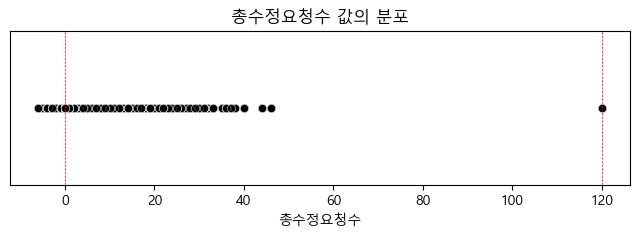

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 2))

sns.scatterplot(x=df['총수정요청수'], y=[0] * len(df), color='black', alpha=0.7)
plt.title('총수정요청수 값의 분포')
plt.yticks([])  # Y축 눈금 제거
plt.ylabel('')  # Y축 레이블만 표시
plt.axvline(x=120, color='red', linestyle='--', linewidth=0.5)
plt.axvline(x=0, color='red', linestyle='--', linewidth=0.5)
plt.show()

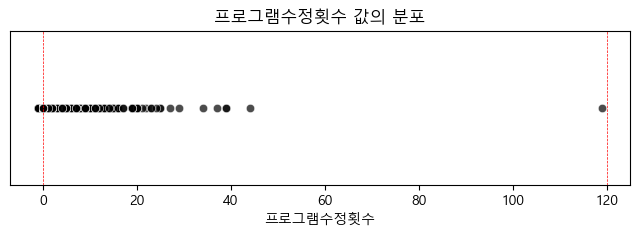

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 2))

sns.scatterplot(x=df['프로그램수정횟수'], y=[0] * len(df), color='black', alpha=0.7)
plt.title('프로그램수정횟수 값의 분포')
plt.yticks([])  # Y축 눈금 제거
plt.ylabel('')  # Y축 레이블만 표시
plt.axvline(x=120, color='red', linestyle='--', linewidth=0.5)
plt.axvline(x=0, color='red', linestyle='--', linewidth=0.5)
plt.show()

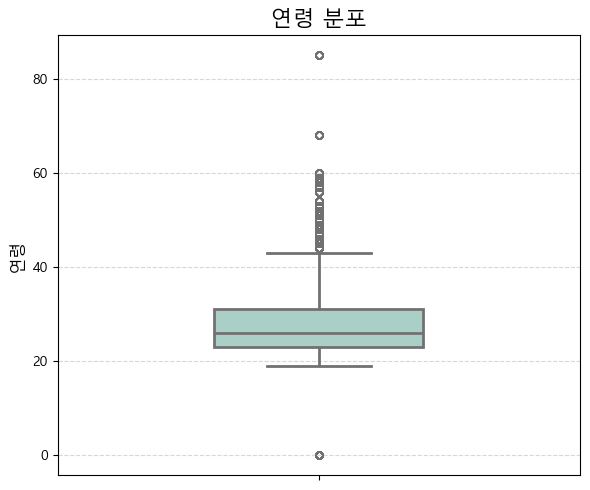

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.boxplot(data=org_df, y='연령', width=0.4, color='#A3D5C9', fliersize=5, linewidth=2)
plt.title('연령 분포', fontsize=16)
plt.ylabel('연령', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [15]:
# 1. **`총수정요청수` 이상치 처리**
# - 이상치 종류: **음수값, 소수점값, 120으로 매우 큰 값**
# - 음수값: 전체 4% -> 프로그램수정횟수로부터 처리 후, 다시
# - **120번 수정한 고객 1명 존재**  : 119번 수정한 로그 삭제(고객ID: 50706003129, log 내역 9건)

cond1 = df['고객ID'] == 50706003129
cond2 = df['프로그램수정횟수'] > 100
df.loc[df['고객ID'] == 50706003129,'총수정요청수'] -= 119
df = df.drop(index=df[cond1&cond2].index).reset_index(drop=True)

# 2. **`프로그램수정횟수` 이상치 처리**
# - 음수 값 0.02% : 거래 중 취소라는 컬럼으로 추가
# 프로그램수정횟수가 음수인 것은 0으로, 거래취소여부도 1로

df['거래취소여부'] = np.where(df['프로그램수정횟수'] < 0, 1, df['거래취소여부'])
df['프로그램수정횟수'] = np.where(df['프로그램수정횟수'] < 0, 0, df['프로그램수정횟수'])

# 수정된 프로그램수정횟수 기반 총수정요청수 재집계
df2 = pd.DataFrame(df.groupby('고객ID')['프로그램수정횟수'].sum()).reset_index()
df2.columns = ['고객ID','new_총수정요청수']
df = pd.merge(df,df2, how='left', on='고객ID').drop(columns='총수정요청수')
# 음수인 프로그램수정횟수를 제거하니, 총수정요청수도 -인 값이 사라졌으므로 이상치 처리 완료

# 연령이 0, 85는 이상치로 처리하고 인스턴스 제거
cond1 = df['연령']==0
cond2 = df['연령']==85
df = df.drop(index = df[cond1|cond2].index).reset_index(drop=True)
df['연령대'] = df['연령']//10*10

# 프로그램수정횟수 소수점이면 인스턴스 제거
cond3 = np.modf(df['프로그램수정횟수'])[0] != 0
df = df.drop(index = df[cond3].index).reset_index(drop=True)


df.shape

(310432, 38)

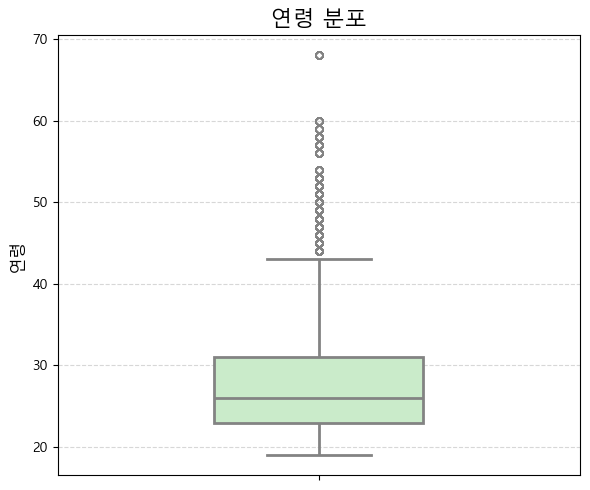

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.boxplot(data=df, y='연령', width=0.4, color='#C4F0C5', fliersize=5, linewidth=2)
plt.title('연령 분포', fontsize=16)
plt.ylabel('연령', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

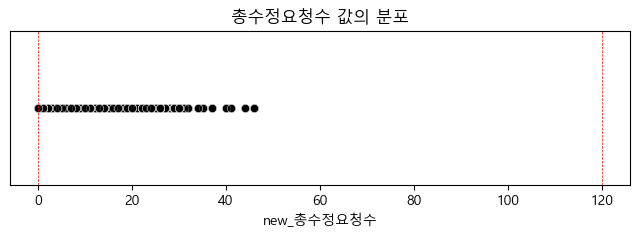

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 2))

sns.scatterplot(x=df['new_총수정요청수'], y=[0] * len(df), color='black', alpha=0.7)
plt.title('총수정요청수 값의 분포')
plt.yticks([])  # Y축 눈금 제거
plt.ylabel('')  # Y축 레이블만 표시
plt.axvline(x=120, color='red', linestyle='--', linewidth=0.5)
plt.axvline(x=0, color='red', linestyle='--', linewidth=0.5)
plt.show()

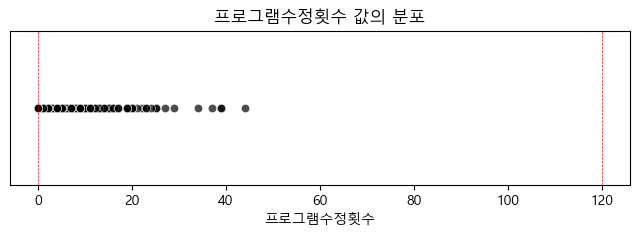

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 2))

sns.scatterplot(x=df['프로그램수정횟수'], y=[0] * len(df), color='black', alpha=0.7)
plt.title('프로그램수정횟수 값의 분포')
plt.yticks([])  # Y축 눈금 제거
plt.ylabel('')  # Y축 레이블만 표시
plt.axvline(x=120, color='red', linestyle='--', linewidth=0.5)
plt.axvline(x=0, color='red', linestyle='--', linewidth=0.5)
plt.show()

In [19]:
print('프로그램수정횟수')
print(f'이상치처리전 표준편차: {org_df['프로그램수정횟수'].std()} 이상치처리후 : {df['프로그램수정횟수'].std()}')
print(f'이상치처리전 최솟값: {org_df['프로그램수정횟수'].min()} 이상치처리후 : {df['프로그램수정횟수'].min()}')
print(f'이상치처리전: {org_df['프로그램수정횟수'].max()} 이상치처리후 : {df['프로그램수정횟수'].max()}')
print('총수정요청수')
print(f'이상치처리전 표준편차: {org_df['총수정요청수'].std()} 이상치처리후 : {df['new_총수정요청수'].std()}')
print(f'이상치처리전 최솟값: {org_df['총수정요청수'].min()} 이상치처리후 : {df['new_총수정요청수'].min()}')
print(f'이상치처리전: {org_df['총수정요청수'].max()} 이상치처리후 : {df['new_총수정요청수'].max()}')

프로그램수정횟수
이상치처리전 표준편차: 0.7222540796322208 이상치처리후 : 0.6730477681581584
이상치처리전 최솟값: -1.0 이상치처리후 : 0.0
이상치처리전: 119.0 이상치처리후 : 44.0
총수정요청수
이상치처리전 표준편차: 4.572756321723036 이상치처리후 : 4.661575290338457
이상치처리전 최솟값: -6.0 이상치처리후 : 0.0
이상치처리전: 120.0 이상치처리후 : 46.0


In [20]:
(df.shape[0]-org_df.shape[0])/org_df.shape[0], df.shape[0]

(-0.09836508383701376, 310432)

### 피처 스케일링

In [21]:
df.select_dtypes(np.number).columns

Index(['수수료율', '고객ID', '프로그램수정횟수', '추가결제금액', '거래취소여부', '판매금액', '서비스가격', '이용자수',
       '서비스번호', 'L사매출', '평균평점', '누적판매수', '판매_서비스_수', '총_판매_금액', '연령',
       '서비스총구매수', '총구매금액', '총추가결제금액', '주문수', 'new_총수정요청수', '연령대'],
      dtype='object')

In [22]:
clm_scale_money = [
         '추가결제금액'
        , '판매금액'
        , '서비스가격'
        , 'L사매출'
        ,  '총_판매_금액'
        , '총구매금액'
        , '총추가결제금액'
          ]

clm_scale_etc = [
       '프로그램수정횟수',
       '이용자수', '누적판매수'
         , '판매_서비스_수',
       '연령', '서비스총구매수', 'new_총수정요청수'
        ]

for col in clm_scale_money:
    #df[col]=df[col].apply(lambda x: np.sqrt(x) if x > 0 else np.nan).fillna(0)
    print(col,' : ',df[col].skew())
print('-'*30)
for col in clm_scale_etc:
    #df[col]=df[col].apply(lambda x: np.sqrt(x) if x > 0 else np.nan).fillna(0)
    print(col,' : ',df[col].skew())

추가결제금액  :  28.51855336543331
판매금액  :  49.91123305077136
서비스가격  :  49.49193045165476
L사매출  :  45.6375968292966
총_판매_금액  :  0.9742555777604288
총구매금액  :  8.15598401943166
총추가결제금액  :  3.857555416886824
------------------------------
프로그램수정횟수  :  11.135072516068293
이용자수  :  3.3837004256692347
누적판매수  :  1.8812124304023918
판매_서비스_수  :  1.6708587460704798
연령  :  1.2076116954449212
서비스총구매수  :  3.0729149935915636
new_총수정요청수  :  4.435335639298347


In [23]:
for col in clm_scale_money:
    if df[col].skew()>3.0:
        df[col]=df[col].apply(lambda x: np.log(x) if x > 0 else np.nan).fillna(0)
        print(col,' : ',df[col].skew())
print('-'*30)
for col in clm_scale_etc:
    if df[col].skew()>3.0:
        df[col]=df[col].apply(lambda x: np.sqrt(x) if x > 0 else np.nan).fillna(0)
        print(col,' : ',df[col].skew())

추가결제금액  :  0.09387207635936924
판매금액  :  -2.999896923090413
서비스가격  :  0.7374212823911226
L사매출  :  -1.850154291126684
총구매금액  :  -1.8010881923038897
총추가결제금액  :  -0.5595544212652075
------------------------------
프로그램수정횟수  :  2.753048706850016
이용자수  :  1.600448346688007
서비스총구매수  :  1.8806286621370716
new_총수정요청수  :  1.8770981519586245


## 데이터 타입 변경

In [24]:
df['거래일자'] = pd.to_datetime(df['거래일자'])
df['수수료율'] = pd.Categorical(df['수수료율'], categories=[6.5, 7.5, 9.0], ordered=True)
#df['거래취소여부'] =  pd.Categorical(df['거래취소여부'])
df['대분류'] =  pd.Categorical(df['대분류'])
df['프리미엄_서비스_가입여부'] =  pd.Categorical(df['프리미엄_서비스_가입여부'])
df['신속_알람_서비스_사용여부'] =  pd.Categorical(df['신속_알람_서비스_사용여부'])
df['유입경로'] =  pd.Categorical(df['유입경로'])
df['회원상태'] =  pd.Categorical(df['회원상태'])
df['거주지'] =  pd.Categorical(df['거주지'])
df['성별'] =  pd.Categorical(df['성별'])
df['사용기기_제조사'] =  pd.Categorical(df['사용기기_제조사'])
df['운영체제'] =  pd.Categorical(df['운영체제'])
df['일회다회'] =  pd.Categorical(df['일회다회'])
df['판매금액_5만원'] = pd.Categorical(df['판매금액_5만원'])
df['판매금액_20만원'] = pd.Categorical(df['판매금액_20만원'])
df['고객ID'] = df['고객ID'].astype('object')
df['서비스번호'] = df['서비스번호'].astype('object')

# EDA

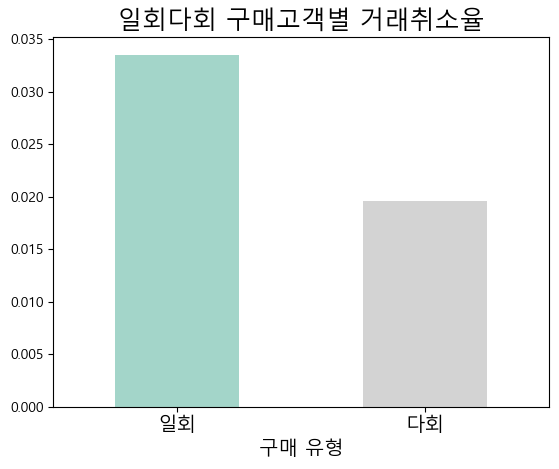

In [25]:
df2 = df.copy()
transaction_cancellation_rate = df2.groupby('일회다회')['거래취소여부'].mean()
# '다회'를 먼저, '일회'를 두 번째로 바꾸기 위해 인덱스를 반대로 변경
transaction_cancellation_rate = transaction_cancellation_rate[::-1]
# 막대그래프 그리기
transaction_cancellation_rate.plot(kind='bar', color=[ '#A3D5C9','lightgrey'])
plt.title('일회다회 구매고객별 거래취소율', fontsize=18)
plt.xticks(rotation=0, fontsize=20)
plt.xlabel('구매 유형', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['일회', '다회'], fontsize=14)
plt.show()

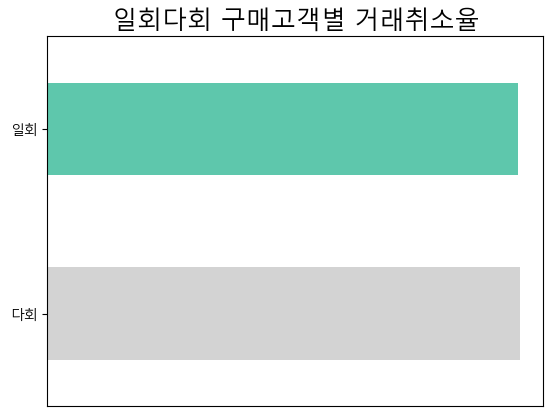

In [26]:
df.groupby('일회다회')['평균평점'].mean().plot(kind='barh', color=['lightgrey','#5EC7AC'])
plt.title('일회다회 구매고객별 거래취소율', fontsize=18)
plt.xticks(rotation=0, fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.show()

In [27]:
from scipy.stats import ttest_ind

col='일회다회'

cond1 = df[col]== np.unique(df[col])[0]
cond2 = df[col]==np.unique(df[col])[1]

g1 = df.loc[cond1,'평균평점']
g2 = df.loc[cond2,'평균평점']

# 분산이 같다. -> 분산이 같을 때, 평균을 봄
t_value, p_value = ttest_ind(g1, g2)
t_value, p_value

# 분산을 보려면 ?
t_value, p_value = ttest_ind(g1, g2, equal_var=True)
print(col)
print(t_value, p_value)
print('-'*30)

일회다회
5.937948895601655 2.889152664332777e-09
------------------------------


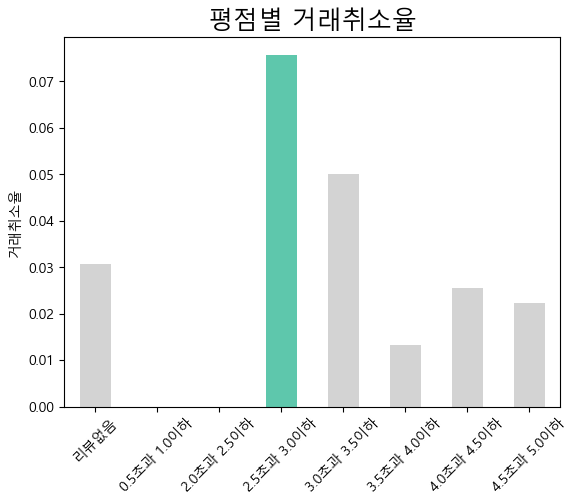

In [28]:
import matplotlib.pyplot as plt

mean_values = df.groupby('평균평점_구간화', observed=True)['거래취소여부'].mean()

max_idx = mean_values.idxmax()

colors = ['#5EC7AC' if idx == max_idx else 'lightgrey' for idx in mean_values.index]

mean_values.plot(kind='bar', color=colors)
plt.title('평점별 거래취소율', fontsize=18)
plt.xticks(rotation=45, fontsize=10)
plt.xlabel('')
plt.ylabel('거래취소율')
plt.show()

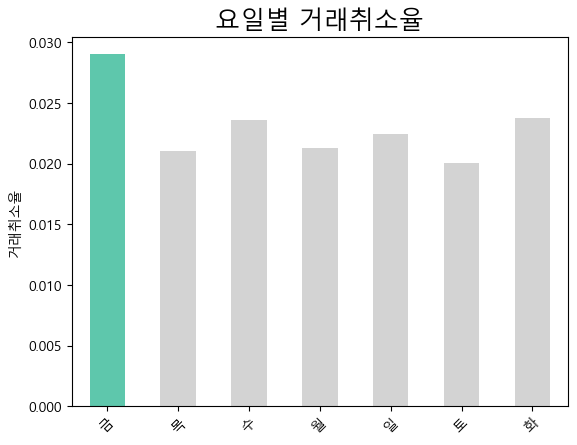

In [29]:
import matplotlib.pyplot as plt

mean_values = df.groupby('요일', observed=True)['거래취소여부'].mean()

max_idx = mean_values.idxmax()

colors = ['#5EC7AC' if idx == max_idx else 'lightgrey' for idx in mean_values.index]

mean_values.plot(kind='bar', color=colors)
plt.title('요일별 거래취소율', fontsize=18)
plt.xticks(rotation=45, fontsize=10)
plt.xlabel('')
plt.ylabel('거래취소율')
plt.show()

**가설: 연령구간에 따른 매출 차이가 있을 것이다.**
-> 결론: 20대,30대,40대 매출의 중앙값은 거의 동일하게 가장 높다

In [30]:
df.groupby('연령대')['L사매출'].describe() # L사매출은 로그화된 값

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
10.0,6141.0,7.540368,1.593929,0.000000,6.715383,7.724005,8.348183,13.172524
20.0,207774.0,7.558304,1.546033,0.000000,6.791783,7.729735,8.332068,14.771119
30.0,77891.0,7.571334,1.530059,0.000000,6.782192,7.729735,8.350312,14.866332
40.0,17496.0,7.583674,1.533196,0.000000,6.821980,7.729735,8.353409,13.527828
50.0,1083.0,7.568477,1.588141,0.000000,6.744645,7.729735,8.411833,13.101283
60.0,47.0,7.752099,1.065021,5.783825,6.976368,7.729735,8.240447,10.992681


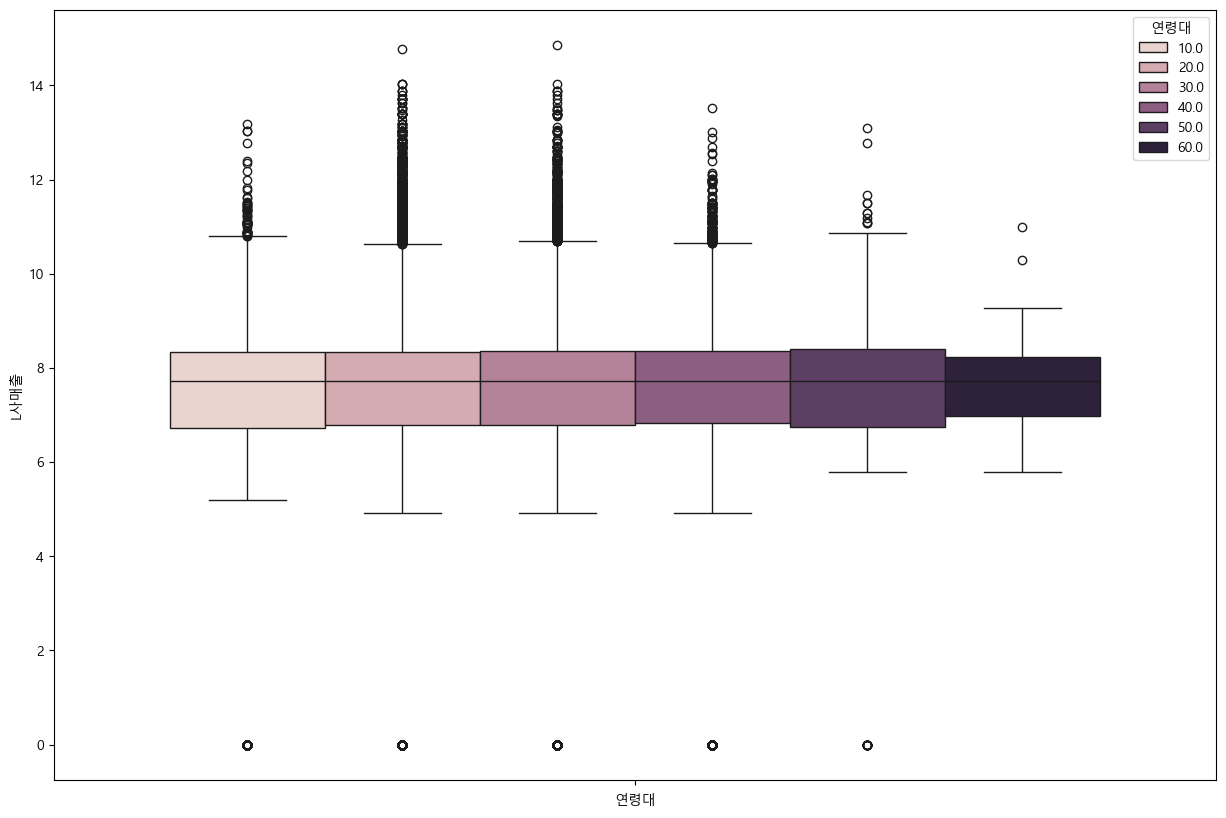

In [31]:
import seaborn as sns
import matplotlib.ticker as mticker

plt.figure(figsize=(15,10))
ax=sns.boxplot(hue='연령대',y='L사매출',data=df)

#y축 포맷을 천 단위 콤마(,)가 포함된 숫자로 변경
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xlabel('연령대')
plt.ylabel('L사매출')
plt.show()

**가설 2: 유입경로에 따라 매출 차이가 있을 것이다.**
- 검색 광고, 직접 검색, SNS(유튜브, 인스타그램 등) 등 유입경로별 매출 차이 분석
- 특정 유입경로가 높은 구매율과 연결되는지 확인

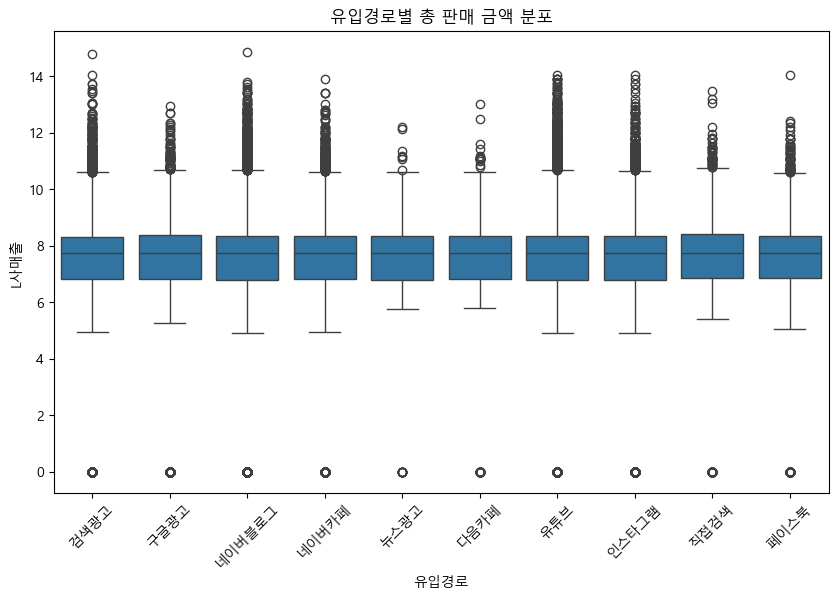

In [32]:
#시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax=sns.boxplot(x='유입경로', y='L사매출', data=df)
plt.title('유입경로별 총 판매 금액 분포')
plt.xticks(rotation=45)

# y축 포맷을 천 단위 콤마(,)가 포함된 숫자로 변경
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

**평점(연속)과 평점(구간)별 L사매출 시각화**

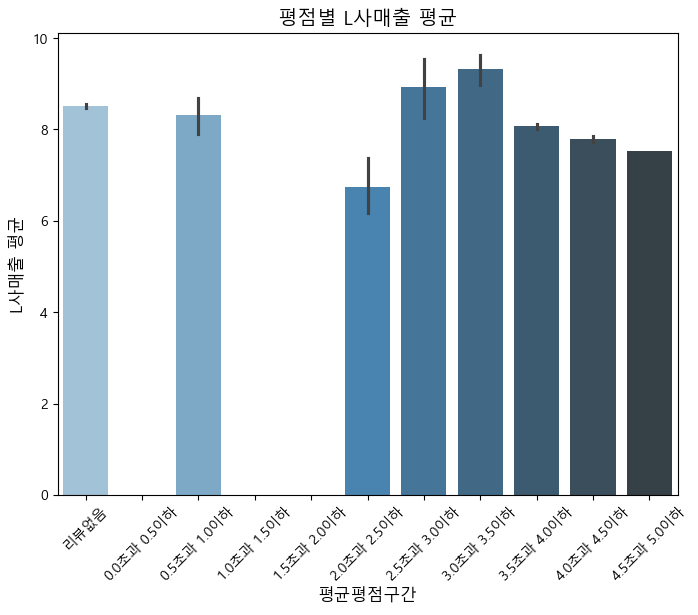

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(x='평균평점_구간화', y='L사매출', data=df, palette='Blues_d')

plt.title('평점별 L사매출 평균', fontsize=14)
plt.xlabel('평균평점구간', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('L사매출 평균', fontsize=12)

plt.show()

**수수료별 신속알림 가입 여부 시각화**
-> 모든 수수료에서 신속알림 서비스를 사용하는 사람이 더 많다, 특히 6.5 구간은 더 많음 - > 6.5 구간에 사람이 몰려서 그런 듯?

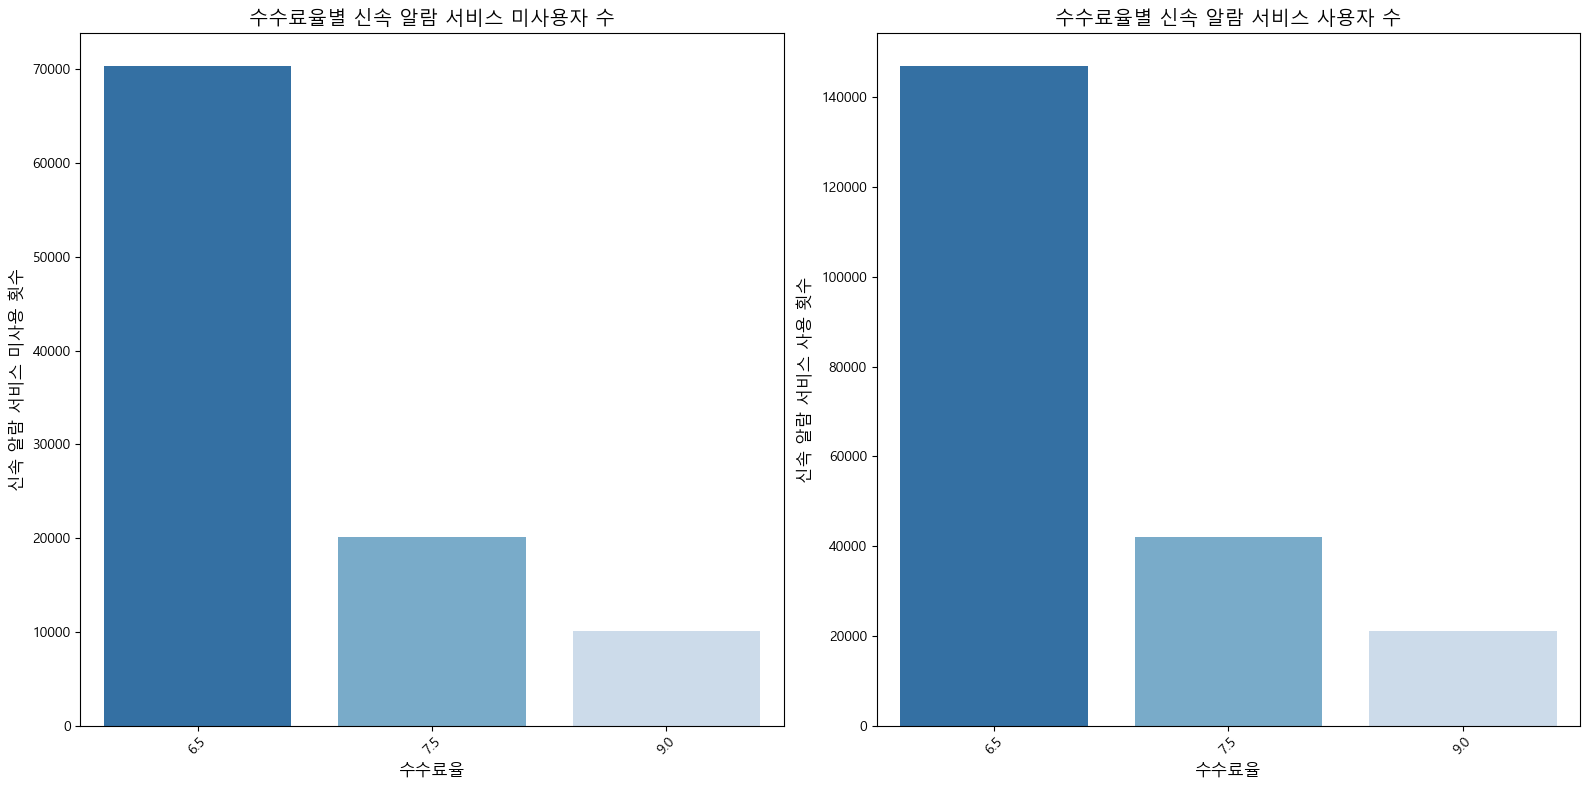

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(16, 8))  # 1행 2열 그래프

조건 = df['신속_알람_서비스_사용여부'] == '미사용'
df_알람사용 = df[조건].groupby('수수료율')['고객ID'].count().reset_index()

# 첫 번째 그래프 (미사용)
sns.barplot(x='수수료율', y='고객ID', data=df_알람사용, palette='Blues_r', ax=ax[0])
ax[0].set_title('수수료율별 신속 알람 서비스 미사용자 수', fontsize=14)
ax[0].set_xlabel('수수료율', fontsize=12)
ax[0].set_ylabel('신속 알람 서비스 미사용 횟수', fontsize=12)
ax[0].tick_params(axis='x', rotation=45)

조건 = df['신속_알람_서비스_사용여부'] == '사용'
df_알람사용 = df[조건].groupby('수수료율')['고객ID'].count().reset_index()

# 두 번째 그래프 (사용)
sns.barplot(x='수수료율', y='고객ID', data=df_알람사용, palette='Blues_r', ax=ax[1])
ax[1].set_title('수수료율별 신속 알람 서비스 사용자 수', fontsize=14)
ax[1].set_xlabel('수수료율', fontsize=12)
ax[1].set_ylabel('신속 알람 서비스 사용 횟수', fontsize=12)
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()  # 그래프 간격 조정
plt.show()

**연령대별 추가결제금액** -> 20대는 수입이 적어서 돈 쓰는 것이 적을 것

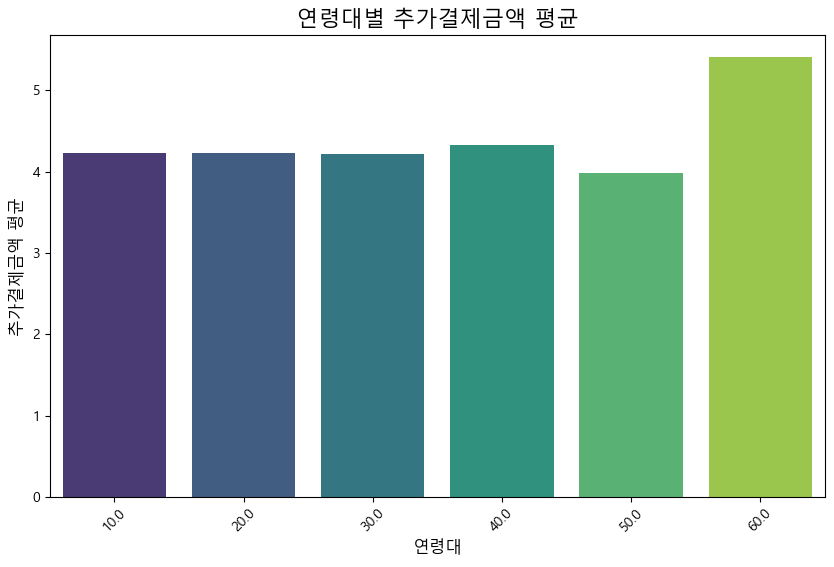

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
result = df.groupby('연령대')['추가결제금액'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='연령대', y='추가결제금액', data=result, palette='viridis')

plt.title('연령대별 추가결제금액 평균', fontsize=16)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('추가결제금액 평균', fontsize=12)
plt.xticks(rotation=45)

plt.show()

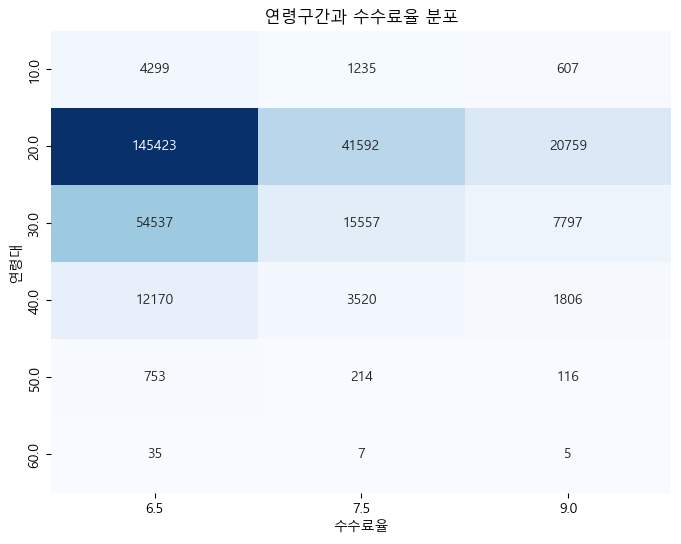

In [36]:
#연령구간과 수수료율을 기준으로 분포
# 교차표 생성
crosstab = pd.crosstab(df['연령대'], df['수수료율'])
# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('연령구간과 수수료율 분포')
plt.show()

# 데이터분석 접근과 인사이트 도출

In [37]:
from scipy.stats import chi2_contingency
c = '거래취소여부'
print('거래취소여부와 유의한 범주형 변수만을 출력합니다.')
for col in ['일회다회','거주지', '대분류', '사용기기_제조사', '성별', '수수료율', '신속_알람_서비스_사용여부', '요일', '운영체제', '유입경로','평균평점_구간화', '프리미엄_서비스_가입여부', '회원상태']:
    obs = pd.crosstab(df[c], df[col])
    chi2_stat, p_value, dof, expected = chi2_contingency(obs)
    if p_value<0.05:
        print(f'{col}과 카이제곱통계량 : {chi2_stat}, 유의확률 :{p_value:.2f}, 자유도: {dof}')
        print('-'*30)

거래취소여부와 유의한 범주형 변수만을 출력합니다.
일회다회과 카이제곱통계량 : 447.2418002733479, 유의확률 :0.00, 자유도: 1
------------------------------
거주지과 카이제곱통계량 : 16.960877494154175, 유의확률 :0.01, 자유도: 6
------------------------------
대분류과 카이제곱통계량 : 278.4606376726579, 유의확률 :0.00, 자유도: 11
------------------------------
사용기기_제조사과 카이제곱통계량 : 11.304016337869555, 유의확률 :0.01, 자유도: 3
------------------------------
요일과 카이제곱통계량 : 73.79746361099683, 유의확률 :0.00, 자유도: 6
------------------------------
운영체제과 카이제곱통계량 : 9.040406124481095, 유의확률 :0.00, 자유도: 1
------------------------------
평균평점_구간화과 카이제곱통계량 : 48.39699588289052, 유의확률 :0.00, 자유도: 7
------------------------------


- 일회고객 거래취소율이 다회고객의 거래취소율보다 유의미하게 높은 것을 확인

In [38]:
import pandas as pd

# 모든 float 값을 소수점 셋째 자리까지 표시
pd.options.display.float_format = '{:.3f}'.format

df.groupby('일회다회')['거래취소여부'].mean()

일회다회
다회   0.020
일회   0.034
Name: 거래취소여부, dtype: float64

In [39]:
from scipy.stats import chi2_contingency

c = '거래취소여부'
obs = pd.crosstab(df2['일회다회'], df2[c])
chi2_stat, p_value, dof, expected = chi2_contingency(obs)
print(c)
print(f'카이제곱통계량 : {chi2_stat}, 유의확률 :{p_value:.2f}, 자유도: {dof}')
print('-'*30)

거래취소여부
카이제곱통계량 : 447.2418002733479, 유의확률 :0.00, 자유도: 1
------------------------------


- 일회, 다회고객의 평균 평점은 유의미한 차이가 있음을 확인

In [40]:
df.groupby('일회다회')['평균평점'].mean()

일회다회
다회   4.837
일회   4.815
Name: 평균평점, dtype: float64

In [41]:
from scipy.stats import ttest_ind

col = '일회다회'
cond1 = df[col]== np.unique(df[col])[0]
cond2 = df[col]==np.unique(df[col])[1]

g1 = df.loc[cond1,'평균평점']
g2 = df.loc[cond2,'평균평점']

t_value, p_value = ttest_ind(g1, g2, equal_var=True)
print(col)
print(t_value, p_value)

일회다회
5.937948895601655 2.889152664332777e-09


- 평점을 남기는 것에 총수정요청수에 따른 차이가 있음을 확인

In [42]:
df.groupby('평균평점_구간화')['new_총수정요청수'].mean()

평균평점_구간화
리뷰없음          0.718
0.0초과 0.5이하     NaN
0.5초과 1.0이하   0.592
1.0초과 1.5이하     NaN
1.5초과 2.0이하     NaN
2.0초과 2.5이하   0.250
2.5초과 3.0이하   0.771
3.0초과 3.5이하   0.746
3.5초과 4.0이하   0.751
4.0초과 4.5이하   0.742
4.5초과 5.0이하   0.770
Name: new_총수정요청수, dtype: float64

In [43]:
from scipy.stats import f_oneway

col_name = '평균평점_구간화'

g1 = df[df[col_name] == '리뷰없음']['new_총수정요청수']
g2 = df[df[col_name] == '0.5초과 1.0이하']['new_총수정요청수']
g3 = df[df[col_name] == '2.0초과 2.5이하']['new_총수정요청수']
g4 = df[df[col_name] == '2.5초과 3.0이하']['new_총수정요청수']
g5 = df[df[col_name] == '3.0초과 3.5이하']['new_총수정요청수']

g6 = df[df[col_name] == '3.5초과 4.0이하']['new_총수정요청수']
g7 = df[df[col_name] == '4.0초과 4.5이하']['new_총수정요청수']
g8 = df[df[col_name] == '4.5초과 5.0이하']['new_총수정요청수']

print(col_name)
print(f_oneway(g1, g2, g3,g4,g5,g6,g7,g8))
print('-'*30)

평균평점_구간화
F_onewayResult(statistic=2.94342277118241, pvalue=0.004403628515415354)
------------------------------


- 거래취소율과 구간평점이 유의미한 차이가 있음을 확인

In [44]:
df.groupby('평균평점_구간화')['거래취소여부'].mean()

평균평점_구간화
리뷰없음          0.031
0.0초과 0.5이하     NaN
0.5초과 1.0이하   0.000
1.0초과 1.5이하     NaN
1.5초과 2.0이하     NaN
2.0초과 2.5이하   0.000
2.5초과 3.0이하   0.076
3.0초과 3.5이하   0.050
3.5초과 4.0이하   0.013
4.0초과 4.5이하   0.025
4.5초과 5.0이하   0.022
Name: 거래취소여부, dtype: float64

In [45]:
from scipy.stats import chi2_contingency

c = '거래취소여부'
obs = pd.crosstab(df2['평균평점_구간화'], df2[c])
chi2_stat, p_value, dof, expected = chi2_contingency(obs)
print(c)
print(f'카이제곱통계량 : {chi2_stat}, 유의확률 :{p_value:.2f}, 자유도: {dof}')
print('-'*30)

거래취소여부
카이제곱통계량 : 48.396995882890515, 유의확률 :0.00, 자유도: 7
------------------------------


In [46]:
df.groupby('판매금액_5만원')['거래취소여부'].mean()

판매금액_5만원
5만원 이하 지불 고객   0.030
5만원 초과 지불 고객   0.000
Name: 거래취소여부, dtype: float64

In [47]:
from scipy.stats import chi2_contingency

c = '판매금액_5만원'
obs = pd.crosstab(df2['거래취소여부'], df2[c])
chi2_stat, p_value, dof, expected = chi2_contingency(obs)
print(c)
print(f'카이제곱통계량 : {chi2_stat}, 유의확률 :{p_value:.2f}, 자유도: {dof}')
print('-'*30)

판매금액_5만원
카이제곱통계량 : 2302.306440547997, 유의확률 :0.00, 자유도: 1
------------------------------


- 거래취소여부에 따른 프로그램 수정 횟수의 유의미한 차이가 있음을 확인

In [48]:
df.groupby('거래취소여부')['프로그램수정횟수'].mean()

거래취소여부
0.000   0.161
1.000   0.000
Name: 프로그램수정횟수, dtype: float64

In [49]:
from scipy.stats import ttest_ind

col = '거래취소여부'
cond1 = df[col]== np.unique(df[col])[0]
cond2 = df[col]==np.unique(df[col])[1]

g1 = df.loc[cond1,'프로그램수정횟수']
g2 = df.loc[cond2,'프로그램수정횟수']

t_value, p_value = ttest_ind(g1, g2, equal_var=True)
print(col)
print(t_value, p_value)

거래취소여부
32.13245917537521 3.6635201144627586e-226


- 요일에 따라 판매량 차이가 있음을 확인

In [50]:
tab = pd.DataFrame(df.groupby('요일').size().reset_index())
tab.columns=['요일','거래건수']
tab

,요일,거래건수
0,금,23373
1,목,41398
2,수,46777
3,월,46160
4,일,46167
5,토,56794
6,화,49763


In [51]:
tab = df[['요일','거래취소여부']].copy()
tab['거래취소여부']=np.where(tab['거래취소여부']==0, 1, 0)
tab.columns=['요일','거래건수']

In [52]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats import f_oneway
대분 = tab['요일'].unique()
col_name='요일'
col='거래건수'

g1 = tab[tab[col_name] == 대분[0]][col]
g2 = tab[tab[col_name] == 대분[1]][col]
g3 = tab[tab[col_name] == 대분[2]][col]
g4 = tab[tab[col_name] == 대분[3]][col]
g5 = tab[tab[col_name] == 대분[4]][col]
g6 = tab[tab[col_name] == 대분[5]][col]
g7 = tab[tab[col_name] == 대분[6]][col]

F, p = f_oneway(g1, g2, g3,g4, g5, g6 ,g7)
if p <0.05:
    print(f'요일별 서비스 판매량에는 유의미한 차이가 있다.')
    print(f_oneway(g1, g2, g3,g4, g5, g6 ,g7))

요일별 서비스 판매량에는 유의미한 차이가 있다.
F_onewayResult(statistic=12.30222446956684, pvalue=6.761544833079061e-14)


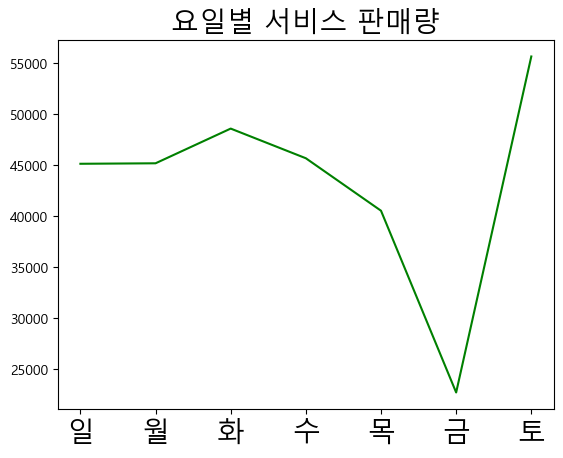

In [53]:
tab = tab.groupby('요일')['거래건수'].sum().reindex(['일', '월', '화', '수', '목', '금', '토'])

tab.plot(kind='line', color='green')
plt.xlabel('')
plt.xticks(fontsize=20)
plt.title('요일별 서비스 판매량', fontsize=20)
plt.show()

- 요일별 취소율의 차이가 존재한다.

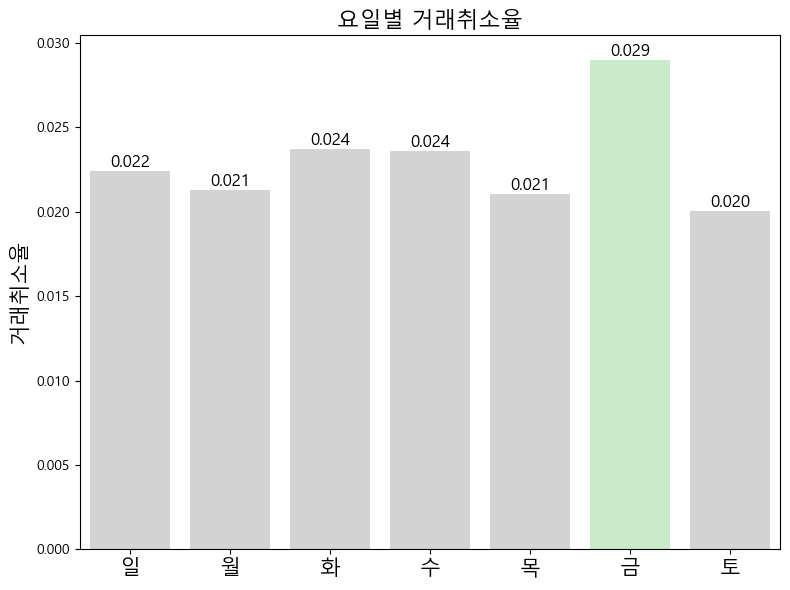

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

order = ['일', '월', '화', '수', '목', '금', '토']
tab = df.groupby('요일')['거래취소여부'].mean().reindex(order)


colors = ['lightgrey','lightgrey','lightgrey','lightgrey','lightgrey','#C4F0C5','lightgrey']
# 시각화
plt.figure(figsize=(8,6))
ax = sns.barplot(x=tab.index, y=tab.values, palette=colors)

# 막대 위에 높이 표시
for i, v in enumerate(tab.values):
    ax.text(i, v, f'{v:.3f}', ha='center', va='bottom', fontsize=12)

plt.xticks(fontsize=15)
plt.xlabel('')
plt.ylabel('거래취소율', fontsize=15)
plt.title('요일별 거래취소율', fontsize=16)
plt.tight_layout()
plt.show()

In [55]:
from scipy.stats import chi2_contingency

c = '거래취소여부'
obs = pd.crosstab(df2['요일'], df2[c])
chi2_stat, p_value, dof, expected = chi2_contingency(obs)
print(c)
print(f'카이제곱통계량 : {chi2_stat}, 유의확률 :{p_value:.2f}, 자유도: {dof}')
print('-'*30)

거래취소여부
카이제곱통계량 : 73.79746361099683, 유의확률 :0.00, 자유도: 6
------------------------------


In [56]:
from scipy.stats import chi2_contingency

obs = pd.crosstab(df['요일'],df['거래취소여부'])
chi2_stat, p_value, dof, expected = chi2_contingency(obs)

print('요일별 거래취소여부 카이제곱검정 결과는 유의합니다.')
print(chi2_stat, p_value, dof)
print('-'*30)

요일별 거래취소여부 카이제곱검정 결과는 유의합니다.
73.79746361099683 6.785877403604195e-14 6
------------------------------


In [57]:
# org_df['거래취소일자'] = pd.to_datetime(org_df['거래취소일자'], format='%Y%m%d')
# org_df['거래일자'] = pd.to_datetime(org_df['거래일자'], format='%Y%m%d')
# cond = org_df['거래취소일자'].notna()
# tab = org_df[cond]
# tab['경과일수'] = (tab['거래취소일자'] - tab['거래일자']).dt.days*(-1)
# pd.DataFrame({'경과일자':idx,'Count':val}).T

# 통계적 가설 검정

In [58]:
col_continuous = df.select_dtypes(np.number).columns
tab = df[col_continuous].agg(['mean', 'median', lambda x: x.mode().iloc[0]])
tab.index = ['mean','median','mode']
tab

,프로그램수정횟수,추가결제금액,거래취소여부,판매금액,서비스가격,이용자수,L사매출,평균평점,누적판매수,판매_서비스_수,총_판매_금액,연령,서비스총구매수,총구매금액,총추가결제금액,주문수,new_총수정요청수,연령대
mean,0.157,4.229,0.023,9.951,9.990,5.894,7.563,4.832,743.934,869.380,25873875.806,27.656,2.437,11.888,6.316,8.855,0.768,23.549
median,0.000,0.000,0.000,10.077,9.903,4.690,7.730,5.000,482.000,604.000,22059740.000,26.000,1.732,11.895,8.748,3.000,0.000,20.000
mode,0.000,0.000,0.000,8.517,8.517,1.414,5.784,5.000,3738.000,4180.000,60150440.000,23.000,1.000,8.517,0.000,1.000,0.000,20.000


### 수수료율 -> 수수료율과 유의한 컬럼이 아예 없음
 **결론** : 거래취소, 거래성사건에서 수수료와 L사 매출은 관계가 있음
- -> 그러나, 수수료율과 L사매출이 유의한 것은 당연함
- -> 수수료율을 책정하기 위한 기준을 찾을 수 없음

In [59]:
df['수수료율'] = pd.Categorical(df['수수료율'], categories=[6.5,7.5,9.0],ordered=True)

In [60]:
col = ['프로그램수정횟수', '추가결제금액','판매금액', '서비스가격', '이용자수',
        'L사매출', '평균평점', '누적판매수', '판매_서비스_수', '총_판매_금액', '연령',
       '서비스총구매수', '총구매금액', '총추가결제금액', '주문수', 'new_총수정요청수', '연령대']
for c in col:
    g1 = df[df['수수료율'] == 6.5][c]
    g2 = df[df['수수료율'] == 7.5][c]
    g3 = df[df['수수료율'] == 9.0][c]
    f, p = f_oneway(g1, g2, g3)
    if p<0.05:
        print('**유의**')
        print(c)
        print(f_oneway(g1, g2, g3))
    else :
        print(f'{c}는 수수료와 유의하지 않음')

프로그램수정횟수는 수수료와 유의하지 않음
추가결제금액는 수수료와 유의하지 않음
판매금액는 수수료와 유의하지 않음
서비스가격는 수수료와 유의하지 않음
이용자수는 수수료와 유의하지 않음
**유의**
L사매출
F_onewayResult(statistic=683.77921412788, pvalue=4.9052400348270274e-297)
평균평점는 수수료와 유의하지 않음
누적판매수는 수수료와 유의하지 않음
판매_서비스_수는 수수료와 유의하지 않음
총_판매_금액는 수수료와 유의하지 않음
연령는 수수료와 유의하지 않음
서비스총구매수는 수수료와 유의하지 않음
총구매금액는 수수료와 유의하지 않음
총추가결제금액는 수수료와 유의하지 않음
주문수는 수수료와 유의하지 않음
new_총수정요청수는 수수료와 유의하지 않음
연령대는 수수료와 유의하지 않음


In [61]:
col = ['거래취소여부','거주지', '대분류', '사용기기_제조사', '성별','신속_알람_서비스_사용여부', '요일', '운영체제', '유입경로', '일회다회', '판매금액_20만원', '판매금액_5만원', '판매자', '평균평점_구간화', '프리미엄_서비스_가입여부', '회원상태']
기준 = '수수료율'
for c in col:
    obs = pd.crosstab(df[기준], df[c])
    chi2_stat, p_value, dof, expected = chi2_contingency(obs)
    if p_value<0.05:
        print('**유의**')
        print(c)
        print(f'카이제곱통계량 : {chi2_stat}, 유의확률 :{p_value:.2f}, 자유도: {dof}')
        print('-'*30)
    else :
        print(f'{c}는 수수료와 유의하지 않음')

거래취소여부는 수수료와 유의하지 않음
거주지는 수수료와 유의하지 않음
대분류는 수수료와 유의하지 않음
사용기기_제조사는 수수료와 유의하지 않음
성별는 수수료와 유의하지 않음
신속_알람_서비스_사용여부는 수수료와 유의하지 않음
요일는 수수료와 유의하지 않음
운영체제는 수수료와 유의하지 않음
유입경로는 수수료와 유의하지 않음
일회다회는 수수료와 유의하지 않음
판매금액_20만원는 수수료와 유의하지 않음
판매금액_5만원는 수수료와 유의하지 않음
판매자는 수수료와 유의하지 않음
평균평점_구간화는 수수료와 유의하지 않음
프리미엄_서비스_가입여부는 수수료와 유의하지 않음
회원상태는 수수료와 유의하지 않음


- **판매자 특징과 검정**
- 판매자별 총평균평점
- 서비스별 평균평점
- 판매서비스수
- 총판매금액
- 판매서비스개수별

In [62]:
df2 = df.copy()
df2['수수료율'] = df2['수수료율'].astype(float)
판매자서비스별평점 = df2[['판매자','서비스명','평균평점']].drop_duplicates()
판매자별평균평점 = pd.DataFrame(판매자서비스별평점.groupby('판매자')['평균평점'].mean())
판매자별수수료합계 = df2.groupby('판매자')[['수수료율']].sum()
tab = pd.merge(pd.merge(판매자별수수료합계, 판매자별평균평점, how='left',on='판매자'),expert[['판매자','총 판매 금액']], how='left',on='판매자')
tab[['수수료율','평균평점','총 판매 금액']].corr()

,수수료율,평균평점,총 판매 금액
수수료율,1.000,0.165,0.442
평균평점,0.165,1.000,0.029
총 판매 금액,0.442,0.029,1.000


In [63]:
# 판매자별 총평균 평점
tab = pd.merge(df[['판매자','수수료율']], df.groupby('판매자')['평균평점'].mean(), how='inner', on='판매자')
obs = pd.crosstab(tab['평균평점'], df['수수료율'])
chi2_stat, p_value, dof, expected = chi2_contingency(obs)

print(clm)
print(chi2_stat, p_value, dof)
print('-'*30)

평균평점
459.2858197345327 0.42197442819760433 454
------------------------------


### 수수료율 소비자 데이터

In [64]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from itertools import combinations



# 그룹별 데이터 추출
groups = df["수수료율"].unique()
data = {g: df[df["수수료율"] == g]["new_총수정요청수"].values for g in groups}

# ANOVA 수행 (3개 이상의 그룹 비교)
f_stat, p_value = stats.f_oneway(*data.values())
print(f"ANOVA 결과: F = {f_stat:.4f}, p-value = {p_value:.4f}")

# ANOVA 결과가 유의하면 사후검정 (Scheffé)
if p_value < 0.05:
    print("\n➡️ 그룹 간 차이가 유의미하므로 Scheffé 사후검정 진행!")

    alpha = 0.05
    df_within = len(df) - len(groups)  # 자유도 계산
    f_critical = stats.f.ppf(1 - alpha, len(groups) - 1, df_within)
    pooled_var = np.var(df["score"], ddof=1)  # 전체 분산

    print("\nScheffé 사후검정 결과:")
    for g1, g2 in combinations(groups, 2):
        n1, n2 = len(data[g1]), len(data[g2])
        mean_diff = abs(np.mean(data[g1]) - np.mean(data[g2]))
        scheffe_crit = np.sqrt(f_critical * pooled_var * (1/n1 + 1/n2))  # 그룹 크기 반영

        print(f"{g1} vs {g2} | Mean Diff: {mean_diff:.2f} | Critical: {scheffe_crit:.2f} | {'유의미한 차이 있음' if mean_diff > scheffe_crit else '차이 없음'}")
else:
    print("\n➡️ 그룹 간 평균 차이가 유의하지 않음 (사후검정 불필요).")


ANOVA 결과: F = 0.3793, p-value = 0.6843

➡️ 그룹 간 평균 차이가 유의하지 않음 (사후검정 불필요).


In [65]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from itertools import combinations



# 그룹별 데이터 추출
groups = df["수수료율"].unique()
data = {g: df[df["수수료율"] == g]["추가결제금액"].values for g in groups}

# ANOVA 수행 (3개 이상의 그룹 비교)
f_stat, p_value = stats.f_oneway(*data.values())
print(f"ANOVA 결과: F = {f_stat:.4f}, p-value = {p_value:.4f}")

# ANOVA 결과가 유의하면 사후검정 (Scheffé)
if p_value < 0.05:
    print("\n➡️ 그룹 간 차이가 유의미하므로 Scheffé 사후검정 진행!")

    alpha = 0.05
    df_within = len(df) - len(groups)  # 자유도 계산
    f_critical = stats.f.ppf(1 - alpha, len(groups) - 1, df_within)
    pooled_var = np.var(df["score"], ddof=1)  # 전체 분산

    print("\nScheffé 사후검정 결과:")
    for g1, g2 in combinations(groups, 2):
        n1, n2 = len(data[g1]), len(data[g2])
        mean_diff = abs(np.mean(data[g1]) - np.mean(data[g2]))
        scheffe_crit = np.sqrt(f_critical * pooled_var * (1/n1 + 1/n2))  # 그룹 크기 반영

        print(f"{g1} vs {g2} | Mean Diff: {mean_diff:.2f} | Critical: {scheffe_crit:.2f} | {'유의미한 차이 있음' if mean_diff > scheffe_crit else '차이 없음'}")
else:
    print("\n➡️ 그룹 간 평균 차이가 유의하지 않음 (사후검정 불필요).")

ANOVA 결과: F = 0.1637, p-value = 0.8490

➡️ 그룹 간 평균 차이가 유의하지 않음 (사후검정 불필요).


In [66]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from itertools import combinations



# 그룹별 데이터 추출
groups = df["수수료율"].unique()
data = {g: df[df["수수료율"] == g]["서비스가격"].values for g in groups}

# ANOVA 수행 (3개 이상의 그룹 비교)
f_stat, p_value = stats.f_oneway(*data.values())
print(f"ANOVA 결과: F = {f_stat:.4f}, p-value = {p_value:.4f}")

# ANOVA 결과가 유의하면 사후검정 (Scheffé)
if p_value < 0.05:
    print("\n➡️ 그룹 간 차이가 유의미하므로 Scheffé 사후검정 진행!")

    alpha = 0.05
    df_within = len(df) - len(groups)  # 자유도 계산
    f_critical = stats.f.ppf(1 - alpha, len(groups) - 1, df_within)
    pooled_var = np.var(df["score"], ddof=1)  # 전체 분산

    print("\nScheffé 사후검정 결과:")
    for g1, g2 in combinations(groups, 2):
        n1, n2 = len(data[g1]), len(data[g2])
        mean_diff = abs(np.mean(data[g1]) - np.mean(data[g2]))
        scheffe_crit = np.sqrt(f_critical * pooled_var * (1/n1 + 1/n2))  # 그룹 크기 반영

        print(f"{g1} vs {g2} | Mean Diff: {mean_diff:.2f} | Critical: {scheffe_crit:.2f} | {'유의미한 차이 있음' if mean_diff > scheffe_crit else '차이 없음'}")
else:
    print("\n➡️ 그룹 간 평균 차이가 유의하지 않음 (사후검정 불필요).")


ANOVA 결과: F = 2.0607, p-value = 0.1274

➡️ 그룹 간 평균 차이가 유의하지 않음 (사후검정 불필요).


### L사매출

In [67]:
col_name = '평균평점_구간화'
리뷰없음 = df[df[col_name] == '리뷰없음']['L사매출']
G1 = df[df[col_name] == '0.0초과 0.5이하']['L사매출']
G2 = df[df[col_name] == '0.5초과 1.0이하']['L사매출']
G3 = df[df[col_name] == '1.0초과 1.5이하']['L사매출']
G4 = df[df[col_name] == '1.5초과 2.0이하']['L사매출']
G5 = df[df[col_name] == '2.0초과 2.5이하']['L사매출']
G6 = df[df[col_name] == '2.5초과 3.0이하']['L사매출']
G7 = df[df[col_name] == '3.0초과 3.5이하']['L사매출']
G8 = df[df[col_name] == '3.5초과 4.0이하']['L사매출']
G9 = df[df[col_name] == '4.0초과 4.5이하']['L사매출']
G10 = df[df[col_name] == '4.5초과 5.0이하']['L사매출']

F, p = f_oneway(리뷰없음, G1, G2, G3, G4, G5, G6, G7, G8, G9, G10)
if p <0.05:
    print(f'{col_name}와 L사매출은 유의합니다.')
else:
    print(f'{col_name}와 L사매출은 유의하지 않습니다..')
print(f_oneway(g1, g2, g3))
print()

from scipy.stats import f_oneway

col_name = '수수료율'
g1 = df[df[col_name] == 6.5]['평균평점']
g2 = df[df[col_name] == 7.5]['평균평점']
g3 = df[df[col_name] == 9.0]['평균평점']

F, p = f_oneway(g1, g2, g3)
if p <0.05:
    print(f'{col_name}와 L사매출은 유의합니다.')
else:
    print(f'{col_name}와 L사매출은 유의하지 않습니다..')
f_oneway(g1, g2, g3)

평균평점_구간화와 L사매출은 유의하지 않습니다..
F_onewayResult(statistic=0.816215533158013, pvalue=0.4421025600700388)

수수료율와 L사매출은 유의하지 않습니다..


F_onewayResult(statistic=1.4973316693520289, pvalue=0.22372795611764104)

In [68]:
col_name = '회원상태'
대분= df[col_name].unique()

from scipy.stats import f_oneway

g1 = df[df[col_name] == 대분[0]]['L사매출']
g2 = df[df[col_name] == 대분[1]]['L사매출']
g3 = df[df[col_name] == 대분[2]]['L사매출']
print(col_name)
\
print(f_oneway(g1, g2, g3))
print('-'*30)

회원상태
F_onewayResult(statistic=0.38616607462228236, pvalue=0.6796579688093953)
------------------------------


In [69]:
연속_컬럼 = ['프로그램수정횟수', '추가결제금액', '판매금액', '서비스가격', '이용자수',
 'L사매출', '평균평점', '누적판매수', '판매_서비스_수', '총_판매_금액', '연령',
       '서비스총구매수', '총구매금액', '총추가결제금액', '거래중취소_추정', 'new_총수정요청수', '총금액']
범주_컬럼 = [ '거래취소여부',
 '거주지',
 '대분류',
 '사용기기_제조사',
 '성별',
 '수수료율',
 '신속_알람_서비스_사용여부',
 '운영체제',
 '유입경로',
 '일회다회',
 '판매금액_5만원',
 '평균평점_구간화',
 '프리미엄_서비스_가입여부',
 '회원상태']

이표본 = []
분산분석 = []
for c in 범주_컬럼:
    if len(df[c].unique()) <= 2:
        이표본.append(c)
    else :
        분산분석.append(c)
print(f'이표본 : {이표본}')
print(f'분산분석 : {분산분석}')

이표본 : ['거래취소여부', '성별', '신속_알람_서비스_사용여부', '운영체제', '일회다회', '판매금액_5만원', '프리미엄_서비스_가입여부']
분산분석 : ['거주지', '대분류', '사용기기_제조사', '수수료율', '유입경로', '평균평점_구간화', '회원상태']


In [70]:
from scipy.stats import fligner
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

t_data = df.copy()
for col in 이표본:
    if t_data[col].dtype == 'object':
        t_data[col] = le.fit_transform(t_data[col])

    cond1 = t_data[col]== np.unique(t_data[col])[0]
    cond2 = t_data[col]==np.unique(t_data[col])[1]

    g1 = t_data.loc[cond1,'L사매출']
    g2 = t_data.loc[cond2,'L사매출']

    print(col)
    print(fligner(g1, g2, center='median'))
    print(fligner(g1, g2, center='mean'))
    print(fligner(g1, g2, center='trimmed'))
    print('-'*30)

거래취소여부
FlignerResult(statistic=663.1768540708358, pvalue=3.0440293649186887e-146)
FlignerResult(statistic=9955.304929367609, pvalue=0.0)
FlignerResult(statistic=4387.141807915341, pvalue=0.0)
------------------------------
성별
FlignerResult(statistic=3.134961803240985, pvalue=0.07663018171759353)
FlignerResult(statistic=57.462935340669716, pvalue=3.444086860675943e-14)
FlignerResult(statistic=15.129497642801768, pvalue=0.00010038249418904291)
------------------------------
신속_알람_서비스_사용여부
FlignerResult(statistic=8349.687076237693, pvalue=0.0)
FlignerResult(statistic=7504.843988687902, pvalue=0.0)
FlignerResult(statistic=10222.069625763366, pvalue=0.0)
------------------------------
운영체제
FlignerResult(statistic=5.708767480157739, pvalue=0.016880387053893386)
FlignerResult(statistic=52.0740824688777, pvalue=5.344571398561156e-13)
FlignerResult(statistic=7.410741209563252, pvalue=0.006483560624447184)
------------------------------
일회다회
FlignerResult(statistic=21.577809282503154, pvalue=3.3

### 서비스가격 회귀

In [71]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# 독립 변수(X)와 종속 변수(y) 분리 / 총추가결제금액, new_총수정요청수
X = df[["연령",'프로그램수정횟수','추가결제금액','수수료율','이용자수','서비스총구매수','총구매금액']]  # 독립 변수들
y = df['서비스가격']  # 종속 변수

# 상수항 추가 (절편 추가)
X = sm.add_constant(X)

# 후진 제거법 구현
def backward_elimination(X, y, significance_level=0.05):
    # 전체 모델 적합
    model = sm.OLS(y, X).fit()

    # p-value 확인
    p_values = model.pvalues
    print("모델 p-values:\n", p_values)

    # p-value가 significance_level보다 큰 변수 제거
    while max(p_values) > significance_level:
        # 가장 큰 p-value 변수 제거
        max_p_value_column = p_values.idxmax()  # p-value가 가장 큰 변수
        X = X.drop(columns=[max_p_value_column])  # 해당 변수 제거
        model = sm.OLS(y, X).fit()  # 새로운 모델 학습
        p_values = model.pvalues  # 새 p-value 계산
        print(f"\n변수 '{max_p_value_column}'을 제거한 후 모델 p-values:\n", p_values)

    return model

# 후진 제거법 실행
final_model = backward_elimination(X, y)

# 최종 모델의 회귀식 출력
def print_regression_equation(model):
    intercept = model.params[0]
    coefficients = model.params[1:]

    equation = f"Y = {intercept:.4f} "
    for i, coef in enumerate(coefficients):
        equation += f"+ {coef:.4f} * X{i+1} "

    print("\n최종 회귀식:")
    print(equation)

# 회귀식 출력
print_regression_equation(final_model)

# 최종 모델의 결과 출력
print("\n최종 모델 결과:\n", final_model.summary())


모델 p-values:
 const      0.000
연령         0.786
프로그램수정횟수   0.000
추가결제금액     0.000
수수료율       0.281
이용자수       0.000
서비스총구매수    0.000
총구매금액      0.000
dtype: float64

변수 '연령'을 제거한 후 모델 p-values:
 const      0.000
프로그램수정횟수   0.000
추가결제금액     0.000
수수료율       0.281
이용자수       0.000
서비스총구매수    0.000
총구매금액      0.000
dtype: float64

변수 '수수료율'을 제거한 후 모델 p-values:
 const      0.000
프로그램수정횟수   0.000
추가결제금액     0.000
이용자수       0.000
서비스총구매수    0.000
총구매금액      0.000
dtype: float64

최종 회귀식:
Y = 7.9053 + 0.0192 * X1 + -0.0055 * X2 + -0.0833 * X3 + -0.2073 * X4 + 0.2609 * X5 

최종 모델 결과:
                             OLS Regression Results                            
Dep. Variable:                  서비스가격   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                 1.544e+04
Date:                Mon, 31 Mar 2025   Prob (F-statistic):               0.00
Time:                

### 총 추가결제금액 회귀

In [72]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# 독립 변수(X)와 종속 변수(y) 분리 /   "추가결제금액"
X = df[["연령",'프로그램수정횟수','수수료율','이용자수','서비스총구매수','총구매금액',"new_총수정요청수","서비스가격"]]  # 독립 변수들
y = df['총추가결제금액']  # 종속 변수

# 상수항 추가 (절편 추가)
X = sm.add_constant(X)

# 후진 제거법 구현
def backward_elimination(X, y, significance_level=0.05):
    # 전체 모델 적합
    model = sm.OLS(y, X).fit()

    # p-value 확인
    p_values = model.pvalues
    print("모델 p-values:\n", p_values)

    # p-value가 significance_level보다 큰 변수 제거
    while max(p_values) > significance_level:
        # 가장 큰 p-value 변수 제거
        max_p_value_column = p_values.idxmax()  # p-value가 가장 큰 변수
        X = X.drop(columns=[max_p_value_column])  # 해당 변수 제거
        model = sm.OLS(y, X).fit()  # 새로운 모델 학습
        p_values = model.pvalues  # 새 p-value 계산
        print(f"\n변수 '{max_p_value_column}'을 제거한 후 모델 p-values:\n", p_values)

    return model

# 후진 제거법 실행
final_model = backward_elimination(X, y)

# 최종 모델의 회귀식 출력
def print_regression_equation(model):
    intercept = model.params[0]
    coefficients = model.params[1:]

    equation = f"Y = {intercept:.4f} "
    for i, coef in enumerate(coefficients):
        equation += f"+ {coef:.4f} * X{i+1} "

    print("\n최종 회귀식:")
    print(equation)

# 회귀식 출력
print_regression_equation(final_model)

# 최종 모델의 결과 출력
print("\n최종 모델 결과:\n", final_model.summary())

모델 p-values:
 const        0.000
연령           0.003
프로그램수정횟수     0.000
수수료율         0.210
이용자수         0.155
서비스총구매수      0.000
총구매금액        0.000
new_총수정요청수   0.000
서비스가격        0.000
dtype: float64

변수 '수수료율'을 제거한 후 모델 p-values:
 const        0.000
연령           0.003
프로그램수정횟수     0.000
이용자수         0.156
서비스총구매수      0.000
총구매금액        0.000
new_총수정요청수   0.000
서비스가격        0.000
dtype: float64

변수 '이용자수'을 제거한 후 모델 p-values:
 const        0.000
연령           0.003
프로그램수정횟수     0.000
서비스총구매수      0.000
총구매금액        0.000
new_총수정요청수   0.000
서비스가격        0.000
dtype: float64

최종 회귀식:
Y = 3.4782 + 0.0035 * X1 + -0.5858 * X2 + -0.7134 * X3 + 0.3786 * X4 + 1.8062 * X5 + -0.1317 * X6 

최종 모델 결과:
                             OLS Regression Results                            
Dep. Variable:                총추가결제금액   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:            

### 추가결제금액 회귀

In [73]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# 독립 변수(X)와 종속 변수(y) 분리 /   "총추가결제금액"
X = df[["연령",'프로그램수정횟수','수수료율','이용자수','서비스총구매수','총구매금액',"new_총수정요청수","서비스가격"]]  # 독립 변수들
y = df['추가결제금액']  # 종속 변수

# 상수항 추가 (절편 추가)
X = sm.add_constant(X)

# 후진 제거법 구현
def backward_elimination(X, y, significance_level=0.05):
    # 전체 모델 적합
    model = sm.OLS(y, X).fit()

    # p-value 확인
    p_values = model.pvalues
    print("모델 p-values:\n", p_values)

    # p-value가 significance_level보다 큰 변수 제거
    while max(p_values) > significance_level:
        # 가장 큰 p-value 변수 제거
        max_p_value_column = p_values.idxmax()  # p-value가 가장 큰 변수
        X = X.drop(columns=[max_p_value_column])  # 해당 변수 제거
        model = sm.OLS(y, X).fit()  # 새로운 모델 학습
        p_values = model.pvalues  # 새 p-value 계산
        print(f"\n변수 '{max_p_value_column}'을 제거한 후 모델 p-values:\n", p_values)

    return model

# 후진 제거법 실행
final_model = backward_elimination(X, y)

# 최종 모델의 회귀식 출력
def print_regression_equation(model):
    intercept = model.params[0]
    coefficients = model.params[1:]

    equation = f"Y = {intercept:.4f} "
    for i, coef in enumerate(coefficients):
        equation += f"+ {coef:.4f} * X{i+1} "

    print("\n최종 회귀식:")
    print(equation)

# 회귀식 출력
print_regression_equation(final_model)

# 최종 모델의 결과 출력
print("\n최종 모델 결과:\n", final_model.summary())

모델 p-values:
 const        0.000
연령           0.279
프로그램수정횟수     0.000
수수료율         0.551
이용자수         0.823
서비스총구매수      0.000
총구매금액        0.000
new_총수정요청수   0.000
서비스가격        0.000
dtype: float64

변수 '이용자수'을 제거한 후 모델 p-values:
 const        0.000
연령           0.279
프로그램수정횟수     0.000
수수료율         0.552
서비스총구매수      0.000
총구매금액        0.000
new_총수정요청수   0.000
서비스가격        0.000
dtype: float64

변수 '수수료율'을 제거한 후 모델 p-values:
 const        0.000
연령           0.278
프로그램수정횟수     0.000
서비스총구매수      0.000
총구매금액        0.000
new_총수정요청수   0.000
서비스가격        0.000
dtype: float64

변수 '연령'을 제거한 후 모델 p-values:
 const        0.000
프로그램수정횟수     0.000
서비스총구매수      0.000
총구매금액        0.000
new_총수정요청수   0.000
서비스가격        0.000
dtype: float64

최종 회귀식:
Y = 3.7727 + 2.5337 * X1 + -0.7067 * X2 + 0.2360 * X3 + -0.4057 * X4 + -0.0714 * X5 

최종 모델 결과:
                             OLS Regression Results                            
Dep. Variable:                 추가결제금액   R-squared:                       0.13

### 회귀 범주

### 평균평점 프로그램 수정수
- 상관계수랑 그래프를 확인하니 경향성 확인
- 최종적으로 회귀분석 결과 유의한가 안한가

In [74]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# 독립 변수(X)와 종속 변수(y) 분리
df_or_nzero = df[df.평균평점 != 0]
df_or_nzero = df[df.평균평점 != 1]

X = df_or_nzero["new_총수정요청수"]
y = df_or_nzero['평균평점']

# 상수항 추가 (절편 추가)
X = sm.add_constant(X)

# 후진 제거법 구현
def backward_elimination(X, y, significance_level=0.05):
    # 전체 모델 적합
    model = sm.OLS(y, X).fit()

    # p-value 확인
    p_values = model.pvalues
    print("p-values:\n", p_values)

    # p-value가 significance_level보다 큰 변수 제거
    while max(p_values) > significance_level:
        # 가장 큰 p-value 변수 제거
        max_p_value_column = p_values.idxmax()  # p-value가 가장 큰 변수
        X = X.drop(columns=[max_p_value_column])  # 해당 변수 제거
        model = sm.OLS(y, X).fit()  # 새로운 모델 학습
        p_values = model.pvalues  # 새 p-value 계산
        print(f"\n변수 '{max_p_value_column}'을 제거한 후 모델 p-values:\n", p_values)

    return model

# 후진 제거법 실행
final_model = backward_elimination(X, y)

# 최종 모델의 회귀식 출력
def print_regression_equation(model):
    intercept = model.params[0]
    coefficients = model.params[1:]

    equation = f"Y = {intercept:.4f} "
    for i, coef in enumerate(coefficients):
        equation += f"+ {coef:.4f} * X{i+1} "

    print("\n최종 회귀식:")
    print(equation)

# 회귀식 출력
print_regression_equation(final_model)

# 최종 모델의 결과 출력
print("\n최종 모델 결과:\n", final_model.summary())


p-values:
 const        0.000
new_총수정요청수   0.000
dtype: float64

최종 회귀식:
Y = 4.8284 + 0.0051 * X1 

최종 모델 결과:
                             OLS Regression Results                            
Dep. Variable:                   평균평점   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     15.94
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           6.55e-05
Time:                        15:24:59   Log-Likelihood:            -3.7464e+05
No. Observations:              310424   AIC:                         7.493e+05
Df Residuals:                  310422   BIC:                         7.493e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------

### 구간화된 평점 & 총수정요청수

new_총수정요청수 와 평균평점_구간화 ANOVA 결과:
F-statistic: 2.9434, p-value: 0.0044

Tukey HSD 결과:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
0.5초과 1.0이하 2.0초과 2.5이하  -0.3415 0.9989 -2.0692  1.3862  False
0.5초과 1.0이하 2.5초과 3.0이하   0.1794 0.9999 -1.1142  1.4729  False
0.5초과 1.0이하 3.0초과 3.5이하   0.1543    1.0 -1.0942  1.4028  False
0.5초과 1.0이하 3.5초과 4.0이하   0.1591 0.9999 -1.0651  1.3834  False
0.5초과 1.0이하 4.0초과 4.5이하   0.1503    1.0 -1.0733  1.3739  False
0.5초과 1.0이하 4.5초과 5.0이하   0.1783 0.9999 -1.0434     1.4  False
0.5초과 1.0이하        리뷰없음   0.1261    1.0 -1.0962  1.3483  False
2.0초과 2.5이하 2.5초과 3.0이하   0.5209 0.9262 -0.7727  1.8144  False
2.0초과 2.5이하 3.0초과 3.5이하   0.4958 0.9311 -0.7527  1.7443  False
2.0초과 2.5이하 3.5초과 4.0이하   0.5006 0.9202 -0.7236  1.7249  False
2.0초과 2.5이하 4.0초과 4.5이하   0.4918 0.9268 -0.7318  1.7154  False
2.0초과 2.5이하 4.5초과 5.0이하   0.5198  

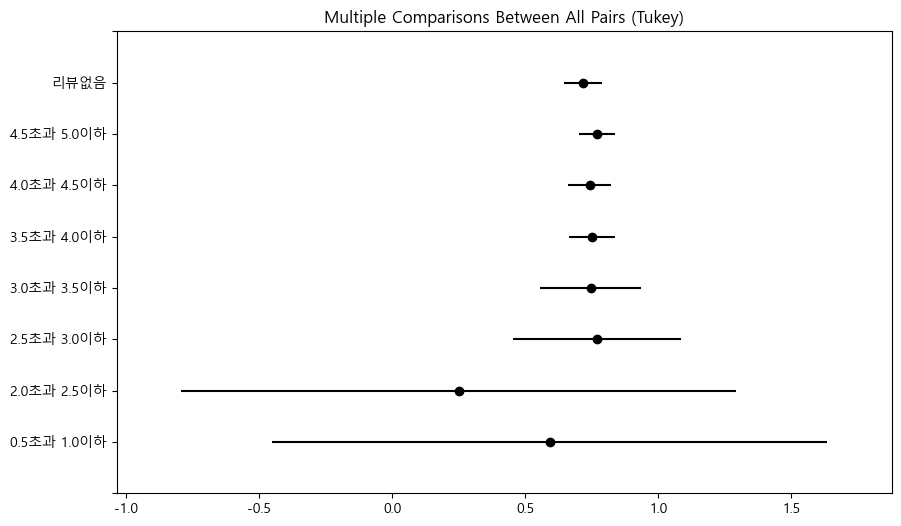

In [75]:
import numpy as np
import pandas as pd
import scipy.stats as stats

group1 = df[df.평균평점_구간화 == "4.5초과 5.0이하"].new_총수정요청수
group2 = df[df.평균평점_구간화 == "4.0초과 4.5이하"].new_총수정요청수
group3 = df[df.평균평점_구간화 == "3.5초과 4.0이하"].new_총수정요청수
group4 = df[df.평균평점_구간화 == "3.0초과 3.5이하"].new_총수정요청수
group5 = df[df.평균평점_구간화 == "2.5초과 3.0이하"].new_총수정요청수
group6 = df[df.평균평점_구간화 == "2.0초과 2.5이하"].new_총수정요청수
group7 = df[df.평균평점_구간화 == "0.5초과 1.0이하"].new_총수정요청수
group8 = df[df.평균평점_구간화 == "리뷰없음"].new_총수정요청수

# ANOVA 수행
f_stat, p_value = stats.f_oneway(group1, group2, group3,group4,group5,group6,group7,group8)

# 결과 출력
print("new_총수정요청수 와 평균평점_구간화 ANOVA 결과:")
print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")

# 사후검정 (Tukey HSD)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 데이터프레임 변환

tukey_result = pairwise_tukeyhsd(df['new_총수정요청수'], df['평균평점_구간화'], alpha=0.05)

# 사후검정 결과 출력
print("\nTukey HSD 결과:")
print(tukey_result)

# 시각화
import matplotlib.pyplot as plt
tukey_result.plot_simultaneous()
plt.show()

### 이용자수 분산분석

In [76]:
from scipy.stats import levene

# 두 집단 데이터
group1 = df["이용자수"]
group2 = df["평균평점"]

# Levene 검정 실행
stat, p = levene(group1, group2)

print(f"Levene 검정 통계량: {stat:.4f}")
print(f"p-value: {p:.4f}")

# 결과 해석
alpha = 0.05
if p < alpha:
    print("귀무가설 기각 → 두 집단의 분산은 다르다!")
else:
    print("귀무가설 채택 → 두 집단의 분산은 같다.")

Levene 검정 통계량: 234228.0528
p-value: 0.0000
귀무가설 기각 → 두 집단의 분산은 다르다!


In [77]:
from scipy.stats import levene

# 두 집단 데이터
group1 = df["이용자수"]
group2 = df["평균평점"]

# Levene 검정 실행
stat, p = levene(group1, group2)

print(f"Levene 검정 통계량: {stat:.4f}")
print(f"p-value: {p:.4f}")

# 결과 해석
alpha = 0.05
if p < alpha:
    print("귀무가설 기각 → 두 집단의 분산은 다르다!")
else:
    print("귀무가설 채택 → 두 집단의 분산은 같다.")


Levene 검정 통계량: 234228.0528
p-value: 0.0000
귀무가설 기각 → 두 집단의 분산은 다르다!


### 거래취소 여부에 따른 T검정

In [78]:
import scipy.stats as stats

df_취소 = df[df['거래취소여부'] == 1]
df_안취소 = df[df['거래취소여부'] == 0]

group1 = df_취소.프로그램수정횟수
group2 = df_안취소.프로그램수정횟수

# 독립 표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(group1, group2)

# 결과 출력
print("t-statistic:", t_stat)
print("p-value:", p_value)

# p-value가 0.05보다 작은지 확인하여 유의성 판단
if p_value < 0.05:
    print("두 그룹의 평균에 유의미한 차이가 있습니다.")
else:
    print("두 그룹의 평균에 유의미한 차이가 없습니다.")

t-statistic: -32.13245917537521
p-value: 3.6635201144627586e-226
두 그룹의 평균에 유의미한 차이가 있습니다.


In [79]:
import scipy.stats as stats

df_취소 = df[df['거래취소여부'] == 1]
df_안취소 = df[df['거래취소여부'] == 0]

group1 = df_취소.추가결제금액
group2 = df_안취소.추가결제금액

# 독립 표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(group1, group2)

# 결과 출력
print("t-statistic:", t_stat)
print("p-value:", p_value)

# p-value가 0.05보다 작은지 확인하여 유의성 판단
if p_value < 0.05:
    print("두 그룹의 평균에 유의미한 차이가 있습니다.")
else:
    print("두 그룹의 평균에 유의미한 차이가 없습니다.")

t-statistic: -50.757967827245615
p-value: 0.0
두 그룹의 평균에 유의미한 차이가 있습니다.


In [80]:
import scipy.stats as stats

df_취소 = df[df['거래취소여부'] == 1]
df_안취소 = df[df['거래취소여부'] == 0]

group1 = df_취소.서비스가격
group2 = df_안취소.서비스가격

# 독립 표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(group1, group2)

# 결과 출력
print("t-statistic:", t_stat)
print("p-value:", p_value)

# p-value가 0.05보다 작은지 확인하여 유의성 판단
if p_value < 0.05:
    print("두 그룹의 평균에 유의미한 차이가 있습니다.")
else:
    print("두 그룹의 평균에 유의미한 차이가 없습니다.")

t-statistic: 6.69401112149207
p-value: 2.1750181933414136e-11
두 그룹의 평균에 유의미한 차이가 있습니다.


In [81]:
import scipy.stats as stats

df_취소 = df[df['거래취소여부'] == 1]
df_안취소 = df[df['거래취소여부'] == 0]

group1 = df_취소.총구매금액
group2 = df_안취소.총구매금액

# 독립 표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(group1, group2)

# 결과 출력
print("t-statistic:", t_stat)
print("p-value:", p_value)

# p-value가 0.05보다 작은지 확인하여 유의성 판단
if p_value < 0.05:
    print("두 그룹의 평균에 유의미한 차이가 있습니다.")
else:
    print("두 그룹의 평균에 유의미한 차이가 없습니다.")

t-statistic: -213.52828862390388
p-value: 0.0
두 그룹의 평균에 유의미한 차이가 있습니다.


In [82]:
import scipy.stats as stats

df_취소 = df[df['거래취소여부'] == 1]
df_안취소 = df[df['거래취소여부'] == 0]

group1 = df_취소.총추가결제금액
group2 = df_안취소.총추가결제금액

# 독립 표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(group1, group2)

# 결과 출력
print("t-statistic:", t_stat)
print("p-value:", p_value)

# p-value가 0.05보다 작은지 확인하여 유의성 판단
if p_value < 0.05:
    print("두 그룹의 평균에 유의미한 차이가 있습니다.")
else:
    print("두 그룹의 평균에 유의미한 차이가 없습니다.")

t-statistic: -14.376832336322185
p-value: 7.488566614791643e-47
두 그룹의 평균에 유의미한 차이가 있습니다.


In [83]:
import scipy.stats as stats

df_취소 = df[df['거래취소여부'] == 1]
df_안취소 = df[df['거래취소여부'] == 0]

group1 = df_취소.new_총수정요청수
group2 = df_안취소.new_총수정요청수

# 독립 표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(group1, group2)

# 결과 출력
print("t-statistic:", t_stat)
print("p-value:", p_value)

# p-value가 0.05보다 작은지 확인하여 유의성 판단
if p_value < 0.05:
    print("두 그룹의 평균에 유의미한 차이가 있습니다.")
else:
    print("두 그룹의 평균에 유의미한 차이가 없습니다.")

t-statistic: -27.160324794657708
p-value: 2.9653677196831063e-162
두 그룹의 평균에 유의미한 차이가 있습니다.


### 거래취소여부

In [84]:
col = [ '거주지', '대분류', '사용기기_제조사', '서비스명', '성별', '수수료율', '신속_알람_서비스_사용여부', '운영체제', '유입경로', '일회다회', '판매자', '프리미엄_서비스_가입여부', '회원상태']
기준='거래취소여부'
for c in col:
    obs = pd.crosstab(df[기준], df[c])
    chi2_stat, p_value, dof, expected = chi2_contingency(obs)
    if p_value<0.05:
        print('**유의**')
        print(c)
        print(f'카이제곱통계량 : {chi2_stat}, 유의확률 :{p_value:.2f}, 자유도: {dof}')
        print('-'*30)
    else :
        print(f'#########{c}는 거래취소여부와 유의하지 않음')

**유의**
거주지
카이제곱통계량 : 16.960877494154175, 유의확률 :0.01, 자유도: 6
------------------------------
**유의**
대분류
카이제곱통계량 : 278.4606376726579, 유의확률 :0.00, 자유도: 11
------------------------------
**유의**
사용기기_제조사
카이제곱통계량 : 11.304016337869555, 유의확률 :0.01, 자유도: 3
------------------------------
**유의**
서비스명
카이제곱통계량 : 12855.682889792675, 유의확률 :0.00, 자유도: 2763
------------------------------
#########성별는 거래취소여부와 유의하지 않음
#########수수료율는 거래취소여부와 유의하지 않음
#########신속_알람_서비스_사용여부는 거래취소여부와 유의하지 않음
**유의**
운영체제
카이제곱통계량 : 9.040406124481095, 유의확률 :0.00, 자유도: 1
------------------------------
#########유입경로는 거래취소여부와 유의하지 않음
**유의**
일회다회
카이제곱통계량 : 447.2418002733479, 유의확률 :0.00, 자유도: 1
------------------------------
**유의**
판매자
카이제곱통계량 : 11008.108972542374, 유의확률 :0.00, 자유도: 2052
------------------------------
#########프리미엄_서비스_가입여부는 거래취소여부와 유의하지 않음
#########회원상태는 거래취소여부와 유의하지 않음


In [85]:
from scipy.stats import ttest_ind

col = '거래취소여부'
for c in ['프로그램수정횟수', '추가결제금액', '판매금액', '서비스가격', '이용자수', 'L사매출', '평균평점', '누적판매수',
       '판매_서비스_수', '총_판매_금액', '연령', '서비스총구매수', '총구매금액', '총추가결제금액', '주문수',
       'new_총수정요청수', '연령대']:

    cond1 = df[col]== 1.0
    cond2 = df[col]==0.0
    g1 = df.loc[cond1,c]
    g2 = df.loc[cond2,c]

    t_value, p_value = ttest_ind(g1, g2, equal_var=True)
    if p_value <0.05:
        print(col)
        print(t_value, p_value)
        print('-'*30)
    else :
        print(f'#####{c}와 거래취소여부는 유의하지 않음')

거래취소여부
-32.13245917537521 3.6635201144627586e-226
------------------------------
거래취소여부
-50.757967827245615 0.0
------------------------------
거래취소여부
-738.965755633047 0.0
------------------------------
거래취소여부
6.69401112149207 2.1750181933414136e-11
------------------------------
#####이용자수와 거래취소여부는 유의하지 않음
거래취소여부
-441.0310657729171 0.0
------------------------------
거래취소여부
-4.711409468231391 2.4611566636981003e-06
------------------------------
거래취소여부
-4.288933894633007 1.7958694176106144e-05
------------------------------
거래취소여부
-3.8405351317091636 0.000122790764960932
------------------------------
#####총_판매_금액와 거래취소여부는 유의하지 않음
#####연령와 거래취소여부는 유의하지 않음
거래취소여부
-21.769397420812975 5.425734262369912e-105
------------------------------
거래취소여부
-213.52828862390388 0.0
------------------------------
거래취소여부
-14.376832336322185 7.488566614791643e-47
------------------------------
거래취소여부
-16.868672917536102 8.168414303985926e-64
------------------------------
거래취소여부
-27.160324794657708 2.96536

### 평점구간과 연관있는 연속형변수

In [86]:
from scipy.stats import f_oneway

col_name = '평균평점_구간화'
for c in [ '프로그램수정횟수', '추가결제금액',
          '판매금액','서비스가격','평균평점','판매_서비스_수',
          '총_판매_금액','연령','총구매금액','추가결제금액'
          ,'추가결제금액','L사매출','누적판매수'
         ,'new_총수정요청수']:

    리뷰없음2 = df2[df2[col_name] == '리뷰없음'][c]

    a0_5초과1_0이하 = df2[df2[col_name] == '0.5초과 1.0이하'][c]
    a2_0초과2_5이하 = df2[df2[col_name] == '2.0초과 2.5이하'][c]
    a2_5초과3_0이하 = df2[df2[col_name] == '2.5초과 3.0이하'][c]
    a3_0초과3_5이하 = df2[df2[col_name] == '3.0초과 3.5이하'][c]
    a3_5초과4_0이하 = df2[df2[col_name] == '3.5초과 4.0이하'][c]
    a4_0초과4_5이하 = df2[df2[col_name] == '4.0초과 4.5이하'][c]
    a4_5초과5_0이하 = df2[df2[col_name] == '4.5초과 5.0이하'][c]
    print(c)

    print(f_oneway(리뷰없음2
                ,a0_5초과1_0이하
                ,a2_0초과2_5이하
                ,a2_5초과3_0이하
                ,a3_0초과3_5이하
                ,a3_5초과4_0이하
                ,a4_0초과4_5이하
                ,a4_5초과5_0이하))
    print('-'*30)

프로그램수정횟수
F_onewayResult(statistic=1.3134784946651432, pvalue=0.239006434382278)
------------------------------
추가결제금액
F_onewayResult(statistic=6.98258191383248, pvalue=2.4009645246222066e-08)
------------------------------
판매금액
F_onewayResult(statistic=411.6237339776919, pvalue=0.0)
------------------------------
서비스가격
F_onewayResult(statistic=1444.1118099687883, pvalue=0.0)
------------------------------
평균평점
F_onewayResult(statistic=6710505.310426693, pvalue=0.0)
------------------------------
판매_서비스_수
F_onewayResult(statistic=506.20503237945906, pvalue=0.0)
------------------------------
총_판매_금액
F_onewayResult(statistic=1155.2573000357484, pvalue=0.0)
------------------------------
연령
F_onewayResult(statistic=1.5935877608359972, pvalue=0.1319992883649535)
------------------------------
총구매금액
F_onewayResult(statistic=74.61321332269515, pvalue=1.5992323912971584e-108)
------------------------------
추가결제금액
F_onewayResult(statistic=6.98258191383248, pvalue=2.4009645246222066e-08)
------

# RFM 분석


- RFM 계산 (Recency구매 최근성, Frequency 구매 빈도, Monetary 구매금액)
</br>
R, F, M을 각각 1~5점으로 점수를 부여하였고, 그 점수는 20%, 40%, 60%, 80% 분위수를 계산해 5등분을 하여
각 구간에 해당하면 그 구간의 점수 할당하였음
</br>
Recency
- 최근 구매일이 가장 가까운 고객 (최근 구매함) → 5점
오래된 고객 → 1점
</br>
Frequency
- 구매빈도 : 고객이 거래 취소를 제외한 구매 횟수를 누적 합산
(거래취소여부가 0인 것은 집계하지 않음)
- 구매빈도 많을수록 5점에 가까움
</br>
Monetary
</br>
- RFM 점수 -> RFM점수는 345 처럼 R, F, M 점수를 연결한 것과 동일함
- 그래서 RFM점수는 RFM점수별로 구매최근성, 구매빈도, 구매금액별로 할당된 점수를 기반으로 그룹화하여 고객층 타겟 전략에 활용함

In [87]:
latestdata = np.max(df['거래일자'])
df['Recency'] = df['거래일자'].apply(lambda x: (latestdata- x).days)

# Frequency 계산 (취소된 거래 제외)
df2 = df.sort_values(by=['고객ID', '거래일자']).copy()
df2['Frequency'] = df2.groupby('고객ID')['거래취소여부'].transform(lambda x: x.eq(0).cumsum()) # 거래 취소가 0이면 1씩 더하기

df = df.sort_values(by=['고객ID', '거래일자'])
df = pd.concat([df, df2['Frequency']], axis=1)

#RFM 점수 계산 _ Quantile이용해서 분위수 기반으로 점수 계산
quintiles = df[['Recency', 'Frequency', '총구매금액']].quantile([.2, .4, .6, .8]).to_dict()

def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5

df['R'] = df['Recency'].apply(r_score)
df['F'] = df['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
df['M'] = df['총구매금액'].apply(lambda x: fm_score(x, '총구매금액'))
df['RFM_Score'] = df['R'].map(str) + df['F'].map(str) + df['M'].map(str)



def calculate_rfm_scores(data):
    quantiles = data[['Recency', 'Frequency', '총구매금액']].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()

    data['R'] = data['Recency'].apply(lambda x: 5 if x <= quantiles['Recency'][0.2] else 4 if x <= quantiles['Recency'][0.4] else 3 if x <= quantiles['Recency'][0.6] else 2 if x <= quantiles['Recency'][0.8] else 1)
    data['F'] = data['Frequency'].apply(lambda x: 1 if x <= quantiles['Frequency'][0.2] else 2 if x <= quantiles['Frequency'][0.4] else 3 if x <= quantiles['Frequency'][0.6] else 4 if x <= quantiles['Frequency'][0.8] else 5)
    data['M'] = data['총구매금액'].apply(lambda x: 1 if x <= quantiles['총구매금액'][0.2] else 2 if x <= quantiles['총구매금액'][0.4] else 3 if x <= quantiles['총구매금액'][0.6] else 4 if x <= quantiles['총구매금액'][0.8] else 5)

    # RFM 점수 문자열 변환
    data['RFM_Score'] = data['R'].astype(str) + data['F'].astype(str) + data['M'].astype(str)
    return data

df = calculate_rfm_scores(df)

# 매핑 -> 주제에 맞게 최우수고객, 신규고객 집중 마케팅
segt_map = {
    r'[4-5][4-5][1-5]': '저가다회구매고객', # 최근에 자주, 많은 금액을 지출한 고객
    r'[5][1][1-5]': '신규고객', # 최근에 한 번 구매
}

df['Segment'] = df['RFM_Score'].replace(segt_map, regex=True)
df['Segment'] = np.where((df['Segment']=='신규고객')|(df['Segment']=='저가다회구매고객'),df['Segment'], '일반고객')
df['Segment'] =  pd.Categorical(df['Segment'])

df.shape

(310432, 45)

In [88]:
pd.set_option('display.float_format', '{:.1f}'.format)  # 소수점 10자리까지 출력

RFM_mean = pd.DataFrame({
'R' : df.groupby('R')['Recency'].mean(),
'F' : df.groupby('F')['Frequency'].mean(),
'M' : np.exp(df.groupby('M')['총구매금액'].mean())})
print("RFM 5등분 기준 구간의 평균:")
RFM_mean

RFM 5등분 기준 구간의 평균:


,R,F,M
1,162.6,1.0,12245.8
2,126.7,NaN,64432.4
3,90.3,2.4,146723.5
4,52.8,4.4,372225.7
5,16.8,16.9,1614485.9


In [89]:
r = df['Recency'].quantile([0,0.2, 0.4, 0.6, 0.8,1.0])
f = df['Frequency'].quantile([0,0.2, 0.4, 0.6, 0.8,1.0])
m = df['총구매금액'].quantile([0,0.2, 0.4, 0.6, 0.8,1.0])

print("RFM 5등분 기준:")
pd.DataFrame(
    {'R':r, 'F':f, 'M':m}
)

RFM 5등분 기준:


,R,F,M
0.0,0.0,0.0,0.0
0.2,34.0,1.0,10.6
0.4,71.0,1.0,11.5
0.6,108.0,3.0,12.3
0.8,144.0,5.0,13.4
1.0,179.0,92.0,17.6


In [90]:
df['Recency'].mean() # 평균구매주기

89.35864537161117

In [91]:
df = df.drop(columns=['R','F','M'])

In [92]:
df['거래취소여부'] = df['거래취소여부'].astype(int)

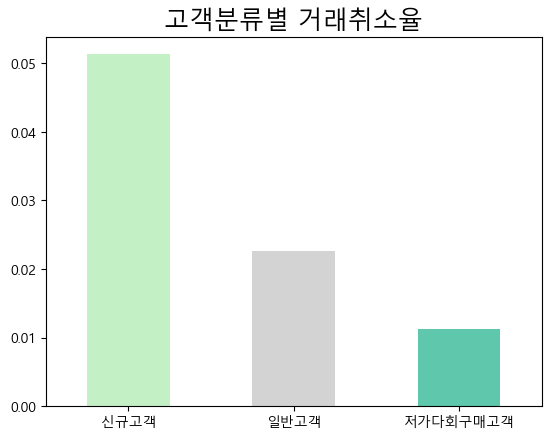

In [93]:
df.groupby('Segment')['거래취소여부'].mean().plot(kind='bar', color=['#C4F0C5','lightgrey','#5EC7AC'])
plt.title('고객분류별 거래취소율', fontsize=18)
plt.xticks(rotation=0)
plt.xlabel('')
plt.show()

In [94]:
# 카이제곱검정결과 추가

비교 = 'Segment'
obs = pd.crosstab(df[비교], df['거래취소여부'])
chi2_stat, p_value, dof, expected = chi2_contingency(obs)
print(c)
print(f'카이제곱통계량 : {chi2_stat}, 유의확률 :{p_value:.2f}, 자유도: {dof}')
if p_value >0.05:
    print(f'{비교}와 {c}은 서로 독립이다.')

new_총수정요청수
카이제곱통계량 : 944.0901359428558, 유의확률 :0.00, 자유도: 2


# RFM 기반 페르소나 특징 도출

### RFM 고객 분류와 통계적으로 유의한 변수 도출

In [95]:
cond_할인 = df['Segment'] == '할인구매고객'
cond_신규 = df['Segment'] == '신규고객'

할인 = df[cond_할인]
신규 = df[cond_신규]

from scipy.stats import chi2_contingency

for c in ['거주지',
 '대분류',
 '사용기기_제조사',
 '서비스명',
 '성별',
 '신속_알람_서비스_사용여부',
 '운영체제',
 '유입경로',
 '일회다회',
 '판매자',
 '프리미엄_서비스_가입여부',
 '회원상태']:
    비교 = 'Segment'
    obs = pd.crosstab(df[비교], df[c])
    chi2_stat, p_value, dof, expected = chi2_contingency(obs)
    print(c)
    print(f'카이제곱통계량 : {chi2_stat}, 유의확률 :{p_value:.2f}, 자유도: {dof}')
    if p_value >0.05:
        print(f'{비교}와 {c}은 서로 독립이다.')
    print('-'*30)

거주지
카이제곱통계량 : 36.730038463487105, 유의확률 :0.00, 자유도: 12
------------------------------
대분류
카이제곱통계량 : 93.8928672349851, 유의확률 :0.00, 자유도: 22
------------------------------
사용기기_제조사
카이제곱통계량 : 33.04185383626072, 유의확률 :0.00, 자유도: 6
------------------------------
서비스명
카이제곱통계량 : 17742.88025201029, 유의확률 :0.00, 자유도: 5526
------------------------------
성별
카이제곱통계량 : 17.555604288797113, 유의확률 :0.00, 자유도: 2
------------------------------
신속_알람_서비스_사용여부
카이제곱통계량 : 6.026898716582622, 유의확률 :0.05, 자유도: 2
------------------------------
운영체제
카이제곱통계량 : 21.899602022744077, 유의확률 :0.00, 자유도: 2
------------------------------
유입경로
카이제곱통계량 : 49.404525065112466, 유의확률 :0.00, 자유도: 18
------------------------------
일회다회
카이제곱통계량 : 50505.67712992843, 유의확률 :0.00, 자유도: 2
------------------------------
판매자
카이제곱통계량 : 13315.745745035358, 유의확률 :0.00, 자유도: 4104
------------------------------
프리미엄_서비스_가입여부
카이제곱통계량 : 22.459094920884656, 유의확률 :0.00, 자유도: 2
------------------------------
회원상태
카이제곱통계량 : 20.526986644298578, 유의확률 :0.0

In [96]:
from scipy.stats import f_oneway
대분 = df['Segment'].unique()
col_name='Segment'
dic = {'독립변수':[],'F통계량':[],'유의확률':[]}
for col in ['수수료율',  '프로그램수정횟수', '추가결제금액', '판매금액',
       '서비스가격', '이용자수', '평균평점', '누적판매수', '판매_서비스_수',
       '총_판매_금액', '연령', '서비스총구매수', '총구매금액', '총추가결제금액',
       'new_총수정요청수']:

    g1 = df[df[col_name] == 대분[0]][col]
    g2 = df[df[col_name] == 대분[1]][col]
    g3 = df[df[col_name] == 대분[2]][col]

    F, p_value = f_oneway(g1, g2, g3)
    if p_value < 0.05:

        print(col_name,'과',col,'분산분석 결과')
        print('F통계량 : ',F)
        print('유의확률 :  ', p_value)
        dic['독립변수'].append(col)
        dic['F통계량'].append(F)
        dic['유의확률'].append(p_value)
    else : print(f'{col_name}의 집단 간 **{col}**의 차이가 없다..')
    # g1, g2, g3,g4,g5,g6,g7,g8,g9,,g9, g10
    print('-'*30)

Segment의 집단 간 **수수료율**의 차이가 없다..
------------------------------
Segment 과 프로그램수정횟수 분산분석 결과
F통계량 :  17.022511196047457
유의확률 :   4.051563746652503e-08
------------------------------
Segment 과 추가결제금액 분산분석 결과
F통계량 :  2694.286814979755
유의확률 :   0.0
------------------------------
Segment 과 판매금액 분산분석 결과
F통계량 :  125.28575683386494
유의확률 :   4.0835228212210314e-55
------------------------------
Segment 과 서비스가격 분산분석 결과
F통계량 :  5.542200627014674
유의확률 :   0.003918283192680783
------------------------------
Segment 과 이용자수 분산분석 결과
F통계량 :  7.940878339985725
유의확률 :   0.0003559660430853732
------------------------------
Segment 과 평균평점 분산분석 결과
F통계량 :  331.8754126430803
유의확률 :   1.0524694752596563e-144
------------------------------
Segment 과 누적판매수 분산분석 결과
F통계량 :  6.0162029659962615
유의확률 :   0.0024391970469600384
------------------------------
Segment 과 판매_서비스_수 분산분석 결과
F통계량 :  4.355728329425542
유의확률 :   0.012833873791198576
------------------------------
Segment 과 총_판매_금액 분산분석 결과
F통계량 :  3.46750141369266

### 저가다회구매고객, 신규고객의 금전적인 특징 도출
### ① 저가다회구매고객

- 저가다회구매고객은 **서비스총구매수**가 평균±표준편차 기준으로 **약 10.7에서 17.5 사이**에 분포하는 경향
- 저가다회구매고객은 **총구매금액**이 일반적으로 **536,581.9원에서 536,588.3원** 사이에 위치
- 할인구매고객은 **평균평점**이 **3.8점에서 5.7점** 범위에 있으며, 대체로 긍정적인 평가
- 할인구매고객의 **연령대**는 주로 **21.1세에서 34.0세**

### ② 신규고객

- 신규고객은 **서비스총구매수**가 **1.2에서 1.3** 사이로, 매우 적은 편
- 신규고객은 **총추가결제금액**이 **151.3원에서 310.5원** 사이로 비교적 소액 결제를 하는 경향
- 신규고객은 **이용자수**가 **12.8명에서 53.6명** 사이
- 신규고객의 **연령대**는 **21.2세에서 34.3세**로, 할인구매고객과 유사한 분포

In [97]:
import numpy as np
import pandas as pd

페르소나_연속 = pd.DataFrame(dic).sort_values('F통계량', ascending=False)
고객리스트 = ['저가다회구매고객', '신규고객']

dac = {
    '타겟층': [],
    '변수': [],
    '최솟값': [],
    '최댓값': []
}

for 고객 in 고객리스트:
    data = df[df['Segment'] == 고객]

    for 변수명 in 페르소나_연속['독립변수']:
        평균 = data[변수명].mean()
        표준편차 = data[변수명].std()

        if 변수명 in ['판매금액', '서비스가격', 'L사매출', '총구매금액', '총추가결제금액']:
            평균 = np.exp(평균)
            표준편차 = np.exp(표준편차)

        if 변수명 in ['프로그램수정횟수', '이용자수', '서비스총구매수', '총수정요청수']:
            평균 = 평균**2
            표준편차 = 표준편차**2

        minimum = 평균 - 표준편차
        maximum = 평균 + 표준편차

        dac['타겟층'].append(고객)
        dac['변수'].append(변수명)
        dac['최솟값'].append(minimum)
        dac['최댓값'].append(maximum)

print('저가다회구매고객과 신규고객 특징 :')
pd.DataFrame(dac)

저가다회구매고객과 신규고객 특징 :


,타겟층,변수,최솟값,최댓값
0,저가다회구매고객,서비스총구매수,10.7,17.5
1,저가다회구매고객,총구매금액,536581.9,536588.3
2,저가다회구매고객,new_총수정요청수,0.0,2.8
3,저가다회구매고객,추가결제금액,-1.1,7.0
4,저가다회구매고객,총추가결제금액,694.7,931.0
5,저가다회구매고객,평균평점,3.8,5.7
6,저가다회구매고객,판매금액,21482.6,21492.3
7,저가다회구매고객,프로그램수정횟수,-0.2,0.2
8,저가다회구매고객,이용자수,15.0,54.8
9,저가다회구매고객,연령,21.1,34.0


In [98]:
from scipy.stats import chi2_contingency
col = 'Segment'
비교 = '수수료율'
obs = pd.crosstab(df[비교],df[col])
chi2_stat, p_value, dof, expected = chi2_contingency(obs)
print(f'카이제곱통계량 : {chi2_stat}, 유의확률 :{p_value:.2f}, 자유도: {dof}')
if p_value >0.05:
    print(f'{비교}와 **{col}**은 서로 독립이다.')
print('-'*30)

카이제곱통계량 : 3.394011053656004, 유의확률 :0.49, 자유도: 4
수수료율와 **Segment**은 서로 독립이다.
------------------------------


## 타겟층인 신규고객, 할인구매고객 특징

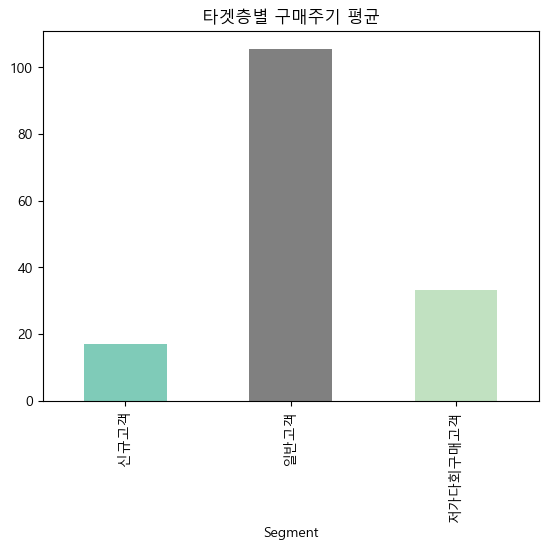

In [99]:
df.groupby('Segment')['Recency'].mean().plot(kind='bar', color=['#7FCBB8','grey','#C1E1C1'])
plt.title('타겟층별 구매주기 평균')
plt.show()

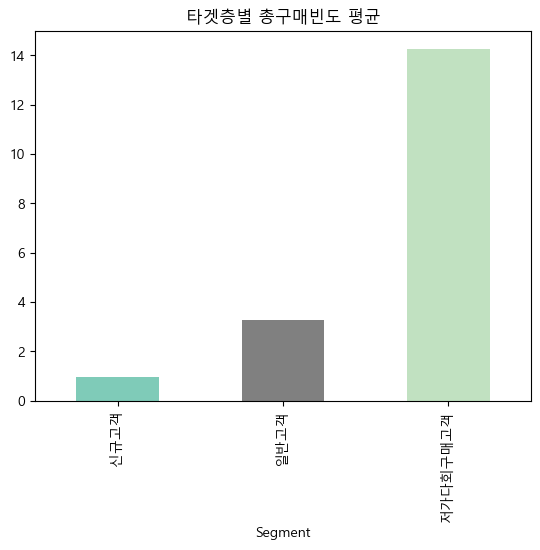

In [100]:
df.groupby('Segment')['Frequency'].mean().plot(kind='bar', color=['#7FCBB8','grey','#C1E1C1'])
plt.title('타겟층별 총구매빈도 평균')
plt.show()

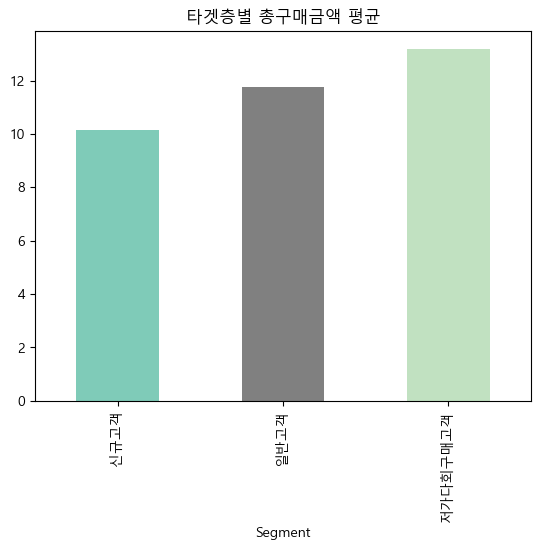

In [101]:
df.groupby('Segment')['총구매금액'].mean().plot(kind='bar', color=['#7FCBB8','grey','#C1E1C1'])
plt.title('타겟층별 총구매금액 평균')
plt.show()

# 모델링

## 데이터타입 변경

In [102]:
clm_model = ['수수료율', '프로그램수정횟수', '추가결제금액', '거래취소여부',
       '판매금액', '서비스가격', '이용자수', '대분류', 'L사매출', '평균평점', '누적판매수',
       '판매_서비스_수', '총_판매_금액', '프리미엄_서비스_가입여부', '신속_알람_서비스_사용여부', '유입경로',
       '회원상태', '거주지', '연령', '성별', '서비스총구매수', '총구매금액', 'new_총수정요청수', '총추가결제금액',
       '사용기기_제조사', '연령대', '판매금액_5만원', '판매금액_20만원', '요일', '평균평점_구간화', '운영체제',
       'Recency', 'Frequency', '주문수',
       '일회다회','Segment']

In [103]:
df.shape

(310432, 42)

In [104]:
df = df[clm_model]

In [105]:
clm_오디너리 = '요일 평균평점_구간화 수수료율 프리미엄_서비스_가입여부	신속_알람_서비스_사용여부	회원상태	일회다회 Segment 판매금액_20만원 판매금액_5만원'.split()
clm_원핫 = '대분류 거주지	성별	사용기기_제조사	운영체제 유입경로 Segment'.split()

mapping_dict = {
    '평균평점_구간화':{'0.5초과 1.0이하':0,'2.5초과 3.0이하':1, '3.0초과 3.5이하':2, '3.5초과 4.0이하':3, '4.0초과 4.5이하':4, '4.5초과 5.0이하':5, '리뷰없음':6}
    ,'수수료율': {6.5:1, 7.5:2, 9.0:3},
    '프리미엄_서비스_가입여부': {'가입':1, '미가입':0},
    '신속_알람_서비스_사용여부': {'미사용':0, '사용':1},
    '회원상태': {'정상회원':2, '탈퇴':0, '탈퇴처리중':1},
    '일회다회': {'다회':1, '일회':0},
    '판매금액_20만원':{'20만원 미만 지불 고객':0, '20만원 이상 지불 고객':1},
    '판매금액_5만원':{'5만원 이하 지불 고객':0, '5만원 초과 지불 고객':1},
    '요일':{'월':1,'화':2,'수':3,'목':4,'금':5,'토':6,'일':7}
}

# 매핑 적용
for col, mapping in mapping_dict.items():
    df[col] = df[col].map(mapping)


df = pd.get_dummies(df, columns = clm_원핫, drop_first = True)
for col in df.select_dtypes(bool).columns:
    df[col]=np.where(df[col]==True,1,0)

df.shape

(310432, 62)

In [106]:
df.columns

Index(['수수료율', '프로그램수정횟수', '추가결제금액', '거래취소여부', '판매금액', '서비스가격', '이용자수', 'L사매출',
       '평균평점', '누적판매수', '판매_서비스_수', '총_판매_금액', '프리미엄_서비스_가입여부',
       '신속_알람_서비스_사용여부', '회원상태', '연령', '서비스총구매수', '총구매금액', 'new_총수정요청수',
       '총추가결제금액', '연령대', '판매금액_5만원', '판매금액_20만원', '요일', '평균평점_구간화', 'Recency',
       'Frequency', '주문수', '일회다회', '대분류_게임', '대분류_기타', '대분류_기획', '대분류_데이터',
       '대분류_디자인', '대분류_모바일', '대분류_인공지능', '대분류_커머스', '대분류_프로그래밍', '대분류_프로그램',
       '대분류_홈페이지', '거주지_경기도', '거주지_경상도', '거주지_서울시', '거주지_전라도', '거주지_제주도',
       '거주지_충청도', '성별_여성', '사용기기_제조사_ETC', '사용기기_제조사_LG', '사용기기_제조사_SAMSUNG',
       '운영체제_iOS', '유입경로_구글광고', '유입경로_네이버블로그', '유입경로_네이버카페', '유입경로_뉴스광고',
       '유입경로_다음카페', '유입경로_유튜브', '유입경로_인스타그램', '유입경로_직접검색', '유입경로_페이스북',
       'Segment_일반고객', 'Segment_저가다회구매고객'],
      dtype='object')

In [107]:
clm_model=['수수료율', '프로그램수정횟수', '추가결제금액', '거래취소여부', '판매금액', '서비스가격', '이용자수', 'L사매출',
       '평균평점', '누적판매수', '판매_서비스_수', '총_판매_금액', '프리미엄_서비스_가입여부',
       '신속_알람_서비스_사용여부', '회원상태', '연령', '서비스총구매수', '총구매금액', 'new_총수정요청수',
       '총추가결제금액', '연령대', '판매금액_5만원', '판매금액_20만원', '요일', '평균평점_구간화', 'Recency',
       'Frequency', '주문수', '일회다회', '대분류_게임', '대분류_기타', '대분류_기획', '대분류_데이터',
       '대분류_디자인', '대분류_모바일', '대분류_인공지능', '대분류_커머스', '대분류_프로그래밍', '대분류_프로그램',
       '대분류_홈페이지', '거주지_경기도', '거주지_경상도', '거주지_서울시', '거주지_전라도', '거주지_제주도',
       '거주지_충청도', '성별_여성', '사용기기_제조사_ETC', '사용기기_제조사_LG', '사용기기_제조사_SAMSUNG',
       '운영체제_iOS', '유입경로_구글광고', '유입경로_네이버블로그', '유입경로_네이버카페', '유입경로_뉴스광고',
       '유입경로_다음카페', '유입경로_유튜브', '유입경로_인스타그램', '유입경로_직접검색', '유입경로_페이스북',
       'Segment_일반고객', 'Segment_저가다회구매고객']

In [108]:
clm_X =  set(df[clm_model])-set('L사매출')
clm_X = list(clm_X)
clm_y = ['L사매출']

cond1 = np.exp(df['판매금액'])>= 200000
cond2 = np.exp(df['판매금액'])< 200000
over = df.loc[cond1,clm_model]
under = df.loc[cond2, clm_model]

## 일반고객(20만원 이하) 회귀

In [109]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

y_col_name = "L사매출"
x_col_name = ["수수료율","프로그램수정횟수","추가결제금액","판매금액",'서비스가격', '이용자수', 'L사매출',
       '평균평점', '누적판매수', '판매_서비스_수', '총_판매_금액','연령','서비스총구매수','총구매금액','총추가결제금액']
x_col_name.remove(y_col_name)

# 독립 변수(X)와 종속 변수(y) 분리
X = under[x_col_name]  # 독립 변수들
y = under[y_col_name]  # 종속 변수

# 상수항 추가 (절편 추가)
X = sm.add_constant(X)

# 후진 제거법 구현
def backward_elimination(X, y, significance_level=0.05):
    # 전체 모델 적합
    model = sm.OLS(y, X).fit()

    # p-value 확인
    p_values = model.pvalues
    print("모델 p-values:\n", p_values)

    # p-value가 significance_level보다 큰 변수 제거
    while max(p_values) > significance_level:
        # 가장 큰 p-value 변수 제거
        max_p_value_column = p_values.idxmax()  # p-value가 가장 큰 변수
        X = X.drop(columns=[max_p_value_column])  # 해당 변수 제거
        model = sm.OLS(y, X).fit()  # 새로운 모델 학습
        p_values = model.pvalues  # 새 p-value 계산
        print(f"\n변수 '{max_p_value_column}'을 제거한 후 모델 p-values:\n", p_values)

    return model

# 후진 제거법 실행
final_model = backward_elimination(X, y)

# 최종 모델의 회귀식 출력
def print_regression_equation(model):
    intercept = model.params[0]
    coefficients = model.params[1:]

    equation = f"Y = {intercept:.4f} "
    for i, coef in enumerate(coefficients):
        equation += f"+ {coef:.4f} * X{i+1} "

    print("\n최종 회귀식:")
    print(equation)

# 회귀식 출력
print_regression_equation(final_model)

# 최종 모델의 결과 출력
print("\n최종 모델 결과:\n", final_model.summary())


모델 p-values:
 const      0.0
수수료율       0.0
프로그램수정횟수   1.0
추가결제금액     0.0
판매금액       0.0
서비스가격      0.0
이용자수       0.0
평균평점       0.0
누적판매수      0.0
판매_서비스_수   0.4
총_판매_금액    0.0
연령         0.0
서비스총구매수    0.0
총구매금액      0.0
총추가결제금액    0.9
dtype: float64

변수 '프로그램수정횟수'을 제거한 후 모델 p-values:
 const      0.0
수수료율       0.0
추가결제금액     0.0
판매금액       0.0
서비스가격      0.0
이용자수       0.0
평균평점       0.0
누적판매수      0.0
판매_서비스_수   0.4
총_판매_금액    0.0
연령         0.0
서비스총구매수    0.0
총구매금액      0.0
총추가결제금액    0.9
dtype: float64

변수 '총추가결제금액'을 제거한 후 모델 p-values:
 const      0.0
수수료율       0.0
추가결제금액     0.0
판매금액       0.0
서비스가격      0.0
이용자수       0.0
평균평점       0.0
누적판매수      0.0
판매_서비스_수   0.4
총_판매_금액    0.0
연령         0.0
서비스총구매수    0.0
총구매금액      0.0
dtype: float64

변수 '판매_서비스_수'을 제거한 후 모델 p-values:
 const     0.0
수수료율      0.0
추가결제금액    0.0
판매금액      0.0
서비스가격     0.0
이용자수      0.0
평균평점      0.0
누적판매수     0.0
총_판매_금액   0.0
연령        0.0
서비스총구매수   0.0
총구매금액     0.0
dtype: float64

최종 회귀식:
Y = -0.9346 

In [110]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

y_col_name = "L사매출"
x_col_name = ["수수료율","프로그램수정횟수","추가결제금액","판매금액",'서비스가격', '이용자수', 'L사매출',
       '평균평점', '누적판매수', '판매_서비스_수', '총_판매_금액','연령','서비스총구매수','총구매금액','총추가결제금액']
x_col_name.remove(y_col_name)

X = under[x_col_name]  # 독립 변수들
y = under[y_col_name]  # 종속 변수

# 상수항 추가 (절편 추가)
X_with_const = add_constant(X)

# VIF 계산 함수
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# VIF 계산
vif_result = calculate_vif(X_with_const)

# VIF 결과 출력
print(vif_result)

    Variable   VIF
0      const 349.1
1       수수료율   1.0
2   프로그램수정횟수   1.1
3     추가결제금액   3.5
4       판매금액   1.8
5      서비스가격   2.6
6       이용자수   1.2
7       평균평점   1.1
8      누적판매수   6.1
9   판매_서비스_수   9.4
10   총_판매_금액   3.4
11        연령   1.0
12   서비스총구매수   2.9
13     총구매금액   2.9
14   총추가결제금액   3.1


## 특수고객 (20만원 초과) 회귀

In [111]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

y_col_name = "L사매출"
x_col_name = ["수수료율","프로그램수정횟수","추가결제금액","판매금액",'서비스가격', '이용자수', 'L사매출',
       '평균평점', '누적판매수', '판매_서비스_수', '총_판매_금액','연령','서비스총구매수','총구매금액','총추가결제금액']
x_col_name.remove(y_col_name)

# 독립 변수(X)와 종속 변수(y) 분리
X = over[x_col_name]  # 독립 변수들
y = over[y_col_name]  # 종속 변수

# 상수항 추가 (절편 추가)
X = sm.add_constant(X)

# 후진 제거법 구현
def backward_elimination(X, y, significance_level=0.05):
    # 전체 모델 적합
    model = sm.OLS(y, X).fit()

    # p-value 확인
    p_values = model.pvalues
    print("모델 p-values:\n", p_values)

    # p-value가 significance_level보다 큰 변수 제거
    while max(p_values) > significance_level:
        # 가장 큰 p-value 변수 제거
        max_p_value_column = p_values.idxmax()  # p-value가 가장 큰 변수
        X = X.drop(columns=[max_p_value_column])  # 해당 변수 제거
        model = sm.OLS(y, X).fit()  # 새로운 모델 학습
        p_values = model.pvalues  # 새 p-value 계산
        print(f"\n변수 '{max_p_value_column}'을 제거한 후 모델 p-values:\n", p_values)

    return model

# 후진 제거법 실행
final_model = backward_elimination(X, y)

# 최종 모델의 회귀식 출력
def print_regression_equation(model):
    intercept = model.params[0]
    coefficients = model.params[1:]

    equation = f"Y = {intercept:.4f} "
    for i, coef in enumerate(coefficients):
        equation += f"+ {coef:.4f} * X{i+1} "

    print("\n최종 회귀식:")
    print(equation)

# 회귀식 출력
print_regression_equation(final_model)

# 최종 모델의 결과 출력
print("\n최종 모델 결과:\n", final_model.summary())


모델 p-values:
 const      0.0
수수료율       0.0
프로그램수정횟수   0.0
추가결제금액     0.0
판매금액       0.0
서비스가격      0.0
이용자수       0.2
평균평점       0.6
누적판매수      0.0
판매_서비스_수   0.5
총_판매_금액    0.0
연령         0.3
서비스총구매수    0.6
총구매금액      0.0
총추가결제금액    0.0
dtype: float64

변수 '평균평점'을 제거한 후 모델 p-values:
 const      0.0
수수료율       0.0
프로그램수정횟수   0.0
추가결제금액     0.0
판매금액       0.0
서비스가격      0.0
이용자수       0.1
누적판매수      0.0
판매_서비스_수   0.5
총_판매_금액    0.0
연령         0.3
서비스총구매수    0.6
총구매금액      0.0
총추가결제금액    0.0
dtype: float64

변수 '서비스총구매수'을 제거한 후 모델 p-values:
 const      0.0
수수료율       0.0
프로그램수정횟수   0.0
추가결제금액     0.0
판매금액       0.0
서비스가격      0.0
이용자수       0.1
누적판매수      0.0
판매_서비스_수   0.5
총_판매_금액    0.0
연령         0.4
총구매금액      0.0
총추가결제금액    0.0
dtype: float64

변수 '판매_서비스_수'을 제거한 후 모델 p-values:
 const      0.0
수수료율       0.0
프로그램수정횟수   0.0
추가결제금액     0.0
판매금액       0.0
서비스가격      0.0
이용자수       0.1
누적판매수      0.0
총_판매_금액    0.0
연령         0.3
총구매금액      0.0
총추가결제금액    0.0
dtype: float64

변수 '연령'을 제거한

In [112]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

y_col_name = "L사매출"
x_col_name = ["수수료율","프로그램수정횟수","추가결제금액","판매금액",'서비스가격', '이용자수', 'L사매출',
       '평균평점', '누적판매수', '판매_서비스_수', '총_판매_금액','연령','서비스총구매수','총구매금액','총추가결제금액']
x_col_name.remove(y_col_name)

X = over[x_col_name]  # 독립 변수들
y = over[y_col_name]  # 종속 변수
# 상수항 추가 (절편 추가)
X_with_const = add_constant(X)

# VIF 계산 함수
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# VIF 계산
vif_result = calculate_vif(X_with_const)

# VIF 결과 출력
print(vif_result)

import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# 독립 변수(X)와 종속 변수(y) 분리
X = df[['프로그램수정횟수','추가결제금액','이용자수','서비스총구매수','총추가결제금액','new_총수정요청수']]
y = df['L사매출']  # 종속 변수

# 상수항 추가 (절편 추가)
X = sm.add_constant(X)

# 후진 제거법 구현
def backward_elimination(X, y, significance_level=0.05):
    # 전체 모델 적합
    model = sm.OLS(y, X).fit()

    # p-value 확인
    p_values = model.pvalues
    print("모델 p-values:\n", p_values)

    # p-value가 significance_level보다 큰 변수 제거
    while max(p_values) > significance_level:
        # 가장 큰 p-value 변수 제거
        max_p_value_column = p_values.idxmax()  # p-value가 가장 큰 변수
        X = X.drop(columns=[max_p_value_column])  # 해당 변수 제거
        model = sm.OLS(y, X).fit()  # 새로운 모델 학습
        p_values = model.pvalues  # 새 p-value 계산
        print(f"\n변수 '{max_p_value_column}'을 제거한 후 모델 p-values:\n", p_values)

    return model

# 후진 제거법 실행
final_model = backward_elimination(X, y)

# 최종 모델의 회귀식 출력
def print_regression_equation(model):
    intercept = model.params[0]
    coefficients = model.params[1:]

    equation = f"Y = {intercept:.4f} "
    for i, coef in enumerate(coefficients):
        equation += f"+ {coef:.4f} * X{i+1} "

    print("\n최종 회귀식:")
    print(equation)

# 회귀식 출력
print_regression_equation(final_model)

# 최종 모델의 결과 출력
print("\n최종 모델 결과:\n", final_model.summary())


    Variable   VIF
0      const 834.0
1       수수료율   1.0
2   프로그램수정횟수   1.1
3     추가결제금액   3.6
4       판매금액  22.3
5      서비스가격  25.1
6       이용자수   1.8
7       평균평점   1.3
8      누적판매수   4.2
9   판매_서비스_수   2.0
10   총_판매_금액   2.6
11        연령   1.0
12   서비스총구매수   5.2
13     총구매금액   6.7
14   총추가결제금액   3.3
모델 p-values:
 const        0.0
프로그램수정횟수     0.0
추가결제금액       0.0
이용자수         0.0
서비스총구매수      0.0
총추가결제금액      0.0
new_총수정요청수   0.0
dtype: float64

최종 회귀식:
Y = 7.4331 + -0.0608 * X1 + 0.1855 * X2 + -0.0732 * X3 + 0.0213 * X4 + -0.0609 * X5 + 0.1553 * X6 

최종 모델 결과:
                             OLS Regression Results                            
Dep. Variable:                   L사매출   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                 1.212e+04
Date:                Mon, 31 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:2

### 수수료율 회귀분석

In [113]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# 독립 변수(X)와 종속 변수(y) 분리
X = under[["연령",'추가결제금액','서비스가격',
           '이용자수','서비스총구매수','총구매금액','총추가결제금액',
           "판매금액",'평균평점','주문수']]
y = under['수수료율']

# 상수항 추가 (절편 추가)
X = sm.add_constant(X)

# 후진 제거법 구현
def backward_elimination(X, y, significance_level=0.05):
    # 전체 모델 적합
    model = sm.OLS(y, X).fit()

    # p-value 확인
    p_values = model.pvalues
    print("모델 p-values:\n", p_values)

    # p-value가 significance_level보다 큰 변수 제거
    while max(p_values) > significance_level:
        # 가장 큰 p-value 변수 제거
        max_p_value_column = p_values.idxmax()  # p-value가 가장 큰 변수
        X = X.drop(columns=[max_p_value_column])  # 해당 변수 제거
        model = sm.OLS(y, X).fit()  # 새로운 모델 학습
        p_values = model.pvalues  # 새 p-value 계산
        print(f"\n변수 '{max_p_value_column}'을 제거한 후 모델 p-values:\n", p_values)

    return model

# 후진 제거법 실행
final_model = backward_elimination(X, y)

# 최종 모델의 회귀식 출력
def print_regression_equation(model):
    intercept = model.params[0]
    coefficients = model.params[1:]

    equation = f"Y = {intercept:.4f} "
    for i, coef in enumerate(coefficients):
        equation += f"+ {coef:.4f} * X{i+1} "

    print("\n최종 회귀식:")
    print(equation)

# 회귀식 출력
print_regression_equation(final_model)

# 최종 모델의 결과 출력
print("\n최종 모델 결과:\n", final_model.summary())


모델 p-values:
 const     0.0
연령        0.2
추가결제금액    0.2
서비스가격     0.9
이용자수      0.5
서비스총구매수   0.9
총구매금액     0.1
총추가결제금액   0.1
판매금액      0.8
평균평점      0.2
주문수       0.9
dtype: float64

변수 '주문수'을 제거한 후 모델 p-values:
 const     0.0
연령        0.2
추가결제금액    0.2
서비스가격     0.9
이용자수      0.5
서비스총구매수   0.7
총구매금액     0.0
총추가결제금액   0.1
판매금액      0.8
평균평점      0.2
dtype: float64

변수 '서비스가격'을 제거한 후 모델 p-values:
 const     0.0
연령        0.2
추가결제금액    0.2
이용자수      0.4
서비스총구매수   0.7
총구매금액     0.0
총추가결제금액   0.1
판매금액      0.8
평균평점      0.1
dtype: float64

변수 '판매금액'을 제거한 후 모델 p-values:
 const     0.0
연령        0.2
추가결제금액    0.2
이용자수      0.4
서비스총구매수   0.7
총구매금액     0.0
총추가결제금액   0.1
평균평점      0.2
dtype: float64

변수 '서비스총구매수'을 제거한 후 모델 p-values:
 const     0.0
연령        0.2
추가결제금액    0.1
이용자수      0.4
총구매금액     0.0
총추가결제금액   0.0
평균평점      0.2
dtype: float64

변수 '이용자수'을 제거한 후 모델 p-values:
 const     0.0
연령        0.2
추가결제금액    0.1
총구매금액     0.0
총추가결제금액   0.0
평균평점      0.1
dtype: float64

변수 '연령'을 제거한 후 모델 

# 창업자 추이 & L사 20만 이상 고객
- 창업 관련해서는 L사를 이용한다면 금액이 클 것이므로

In [114]:
startup = pd.read_excel("창업기업수_2021상반기_전체만.xlsx")

In [115]:
# @title
import warnings
warnings.filterwarnings('ignore')

MMM = startup[startup.구분 == "전체"]
MMM.거래일자 = MMM.거래일자.astype(str)
MMM.거래일자 = MMM.거래일자.replace(".","-")
MMM['거래일자'] = pd.to_datetime(MMM['거래일자'])
MMM['거래일자'] = MMM['거래일자'].dt.to_period('M')
AAA = MMM.창업수

ordf = org_df.copy()
ordf['거래일자'] = pd.to_datetime(ordf['거래일자'], format='%Y%m%d')
AAA = AAA.reset_index().창업수
NNN = ordf.groupby(ordf['거래일자'].dt.to_period('M')).서비스총구매수.sum()
NNN.columns = ["거래일자","서비스총구매수"]
NNN = NNN.reset_index()
RRR = pd.concat([NNN,AAA],axis=1)
GGG = RRR[["서비스총구매수","창업수"]]

from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 선언 및 Fitting
mMscaler = MinMaxScaler()
mMscaler.fit(GGG)

# 데이터 변환
mMscaled_data = mMscaler.transform(GGG)

# 데이터 프레임으로 저장
mMscaled_data = pd.DataFrame(mMscaled_data)
mMscaled_data.columns = ["서비스총구매수","창업수"]
print('서비스총구매수와 창업수의 약한 양의 상관관계')
mMscaled_data[["서비스총구매수","창업수"]].corr()

서비스총구매수와 창업수의 약한 양의 상관관계


,서비스총구매수,창업수
서비스총구매수,1.0,0.2
창업수,0.2,1.0
